<a href="https://colab.research.google.com/github/LanqingDu/UnstructuredDataAnalytics/blob/main/03_R_Intro_BA4.ipynb" target="_blank">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **Getting Started with R Language**



> **Instructor:** Dr. Lanqing Du  
> **Acknowledgement:** This notebook referenced to R user guide content, Machine Learning resoures, and the content created by Prof.Timothy E. Carone.  
> **Objective:** Introduction to R.  
> **Instructions:** You can preview the **Table of Contents** from the side bar.

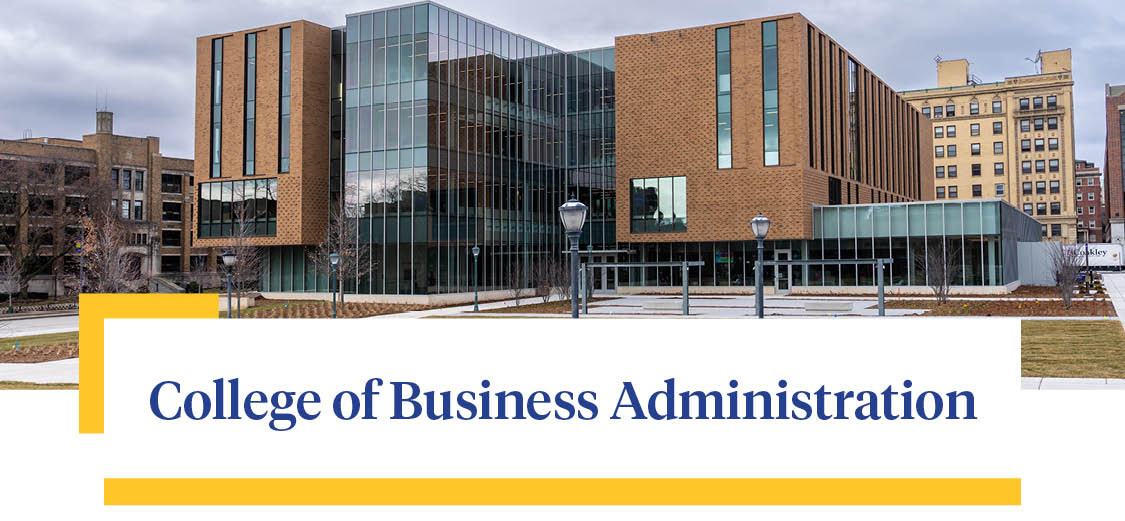
---

## [1. Intro](#intro)



### 1.1 Human, Data, Analytics, and Business Intelligence

In Week 1, we examined the objective and process lifecycle of business analytics, emphasizing the central role of data and human involvement.

In summary, an AI–Human–Business context model can be represented as follows:

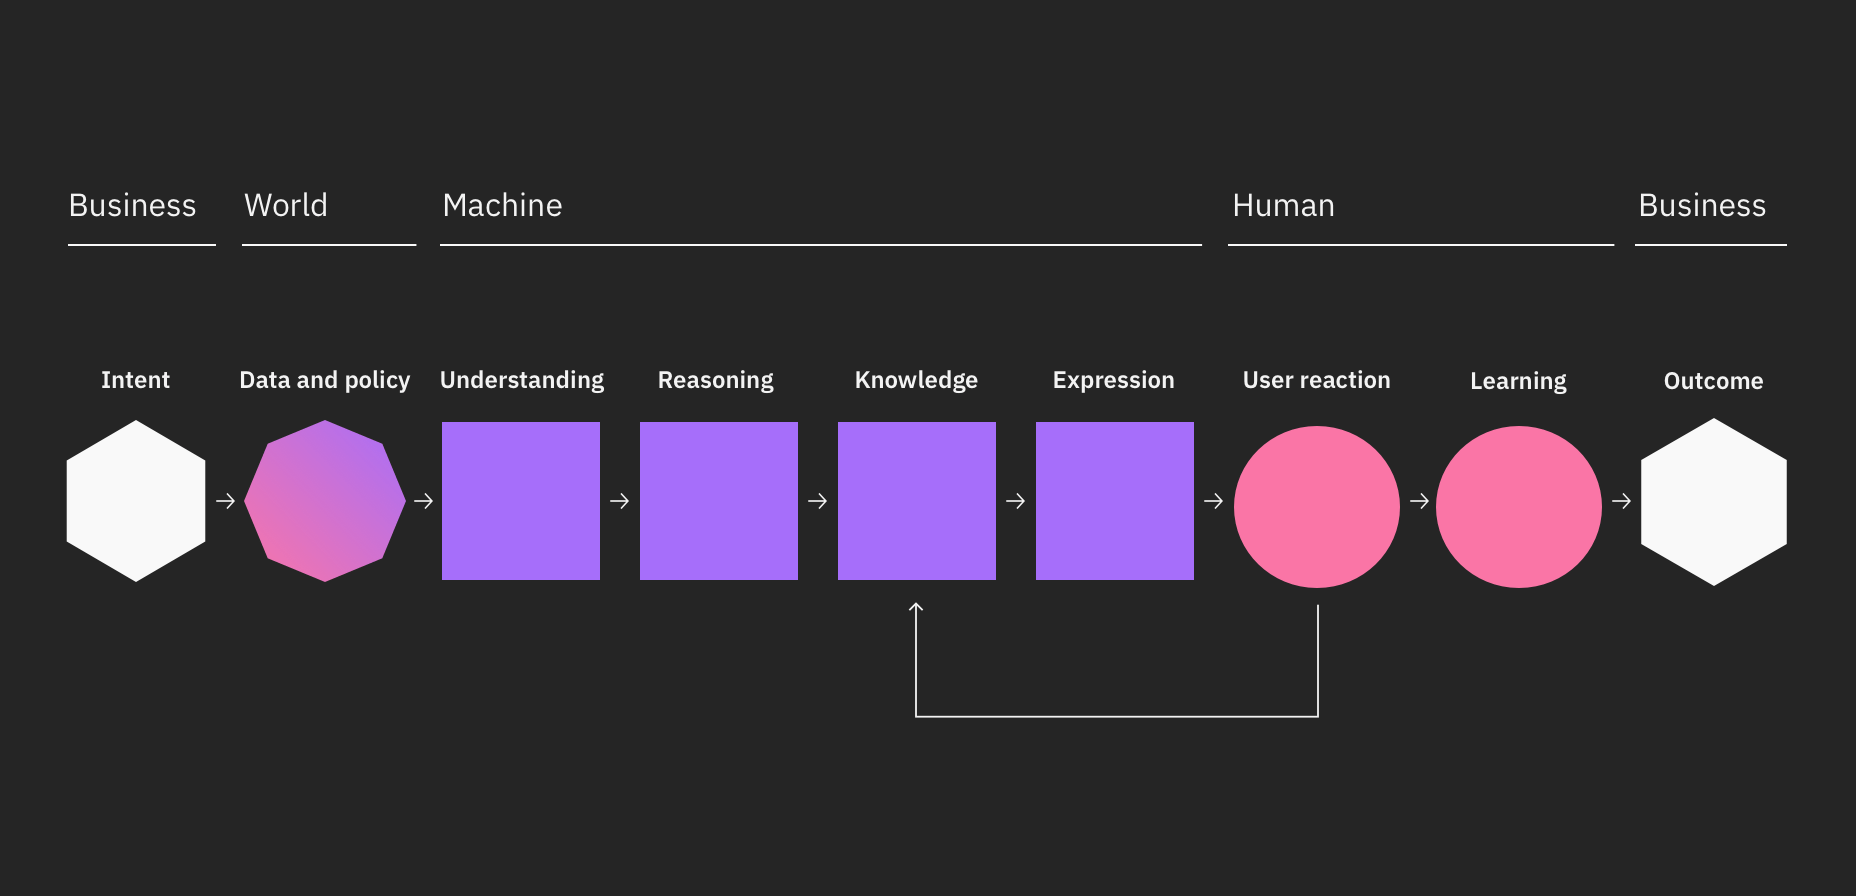

(Image Credit: [IBM](https://www.ibm.com/design/ai/fundamentals/#aihuman-context-model))

### 1.2 Machine Learning: Supervised, Unsupervised, and Reinforcement Learning

After strategic planning, data collection, cleaning, and enrichment, the next step is to apply analytical models to derive and deliver actionable insights.

Machine Learning can be viewed as a type of analytical model that leverages algorithms based on computational statistics to automate the model-building process. Machine Learning is typically categorized into Supervised Learning, Unsupervised Learning, and Reinforcement Learning.

1. **Supervised Learning**: Learns from **labeled** data to predict outcomes or classify new data.

2. **Unsupervised Learning**: Finds patterns or structures in **unlabeled** data (e.g., clustering, dimensionality reduction).

3. **Reinforcement Learning**: Learns to make **sequential decisions** by interacting with an environment and receiving feedback (rewards or penalties). <br>


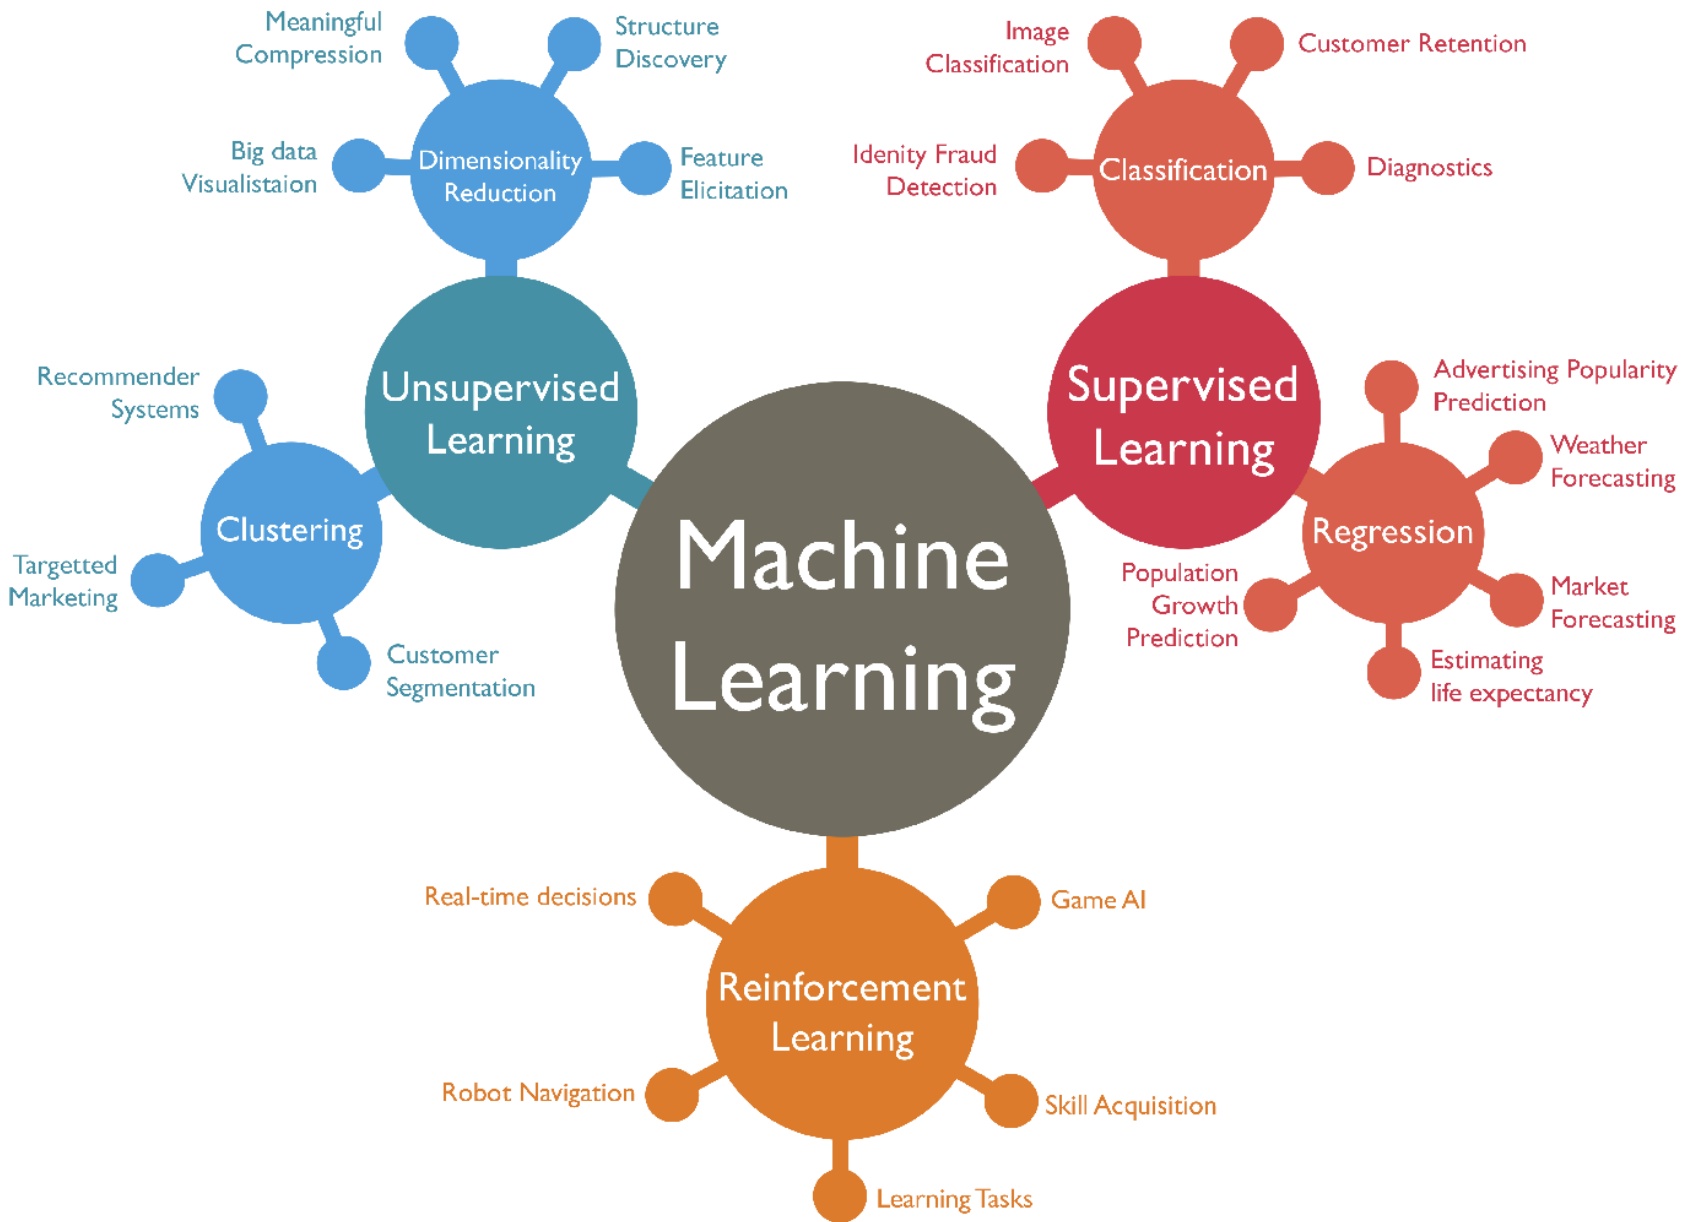

(Image Credit: [Linkedin](https://www.linkedin.com/pulse/business-intelligence-its-relationship-big-data-geekstyle/))

### 1.3 Boarder Technical Landscape

The current technical landscape situates Machine Learning within the broader field of Artificial Intelligence. From another perspective, these technologies can be viewed across three levels: Artificial Intelligence, Machine Learning, and Deep Learning.

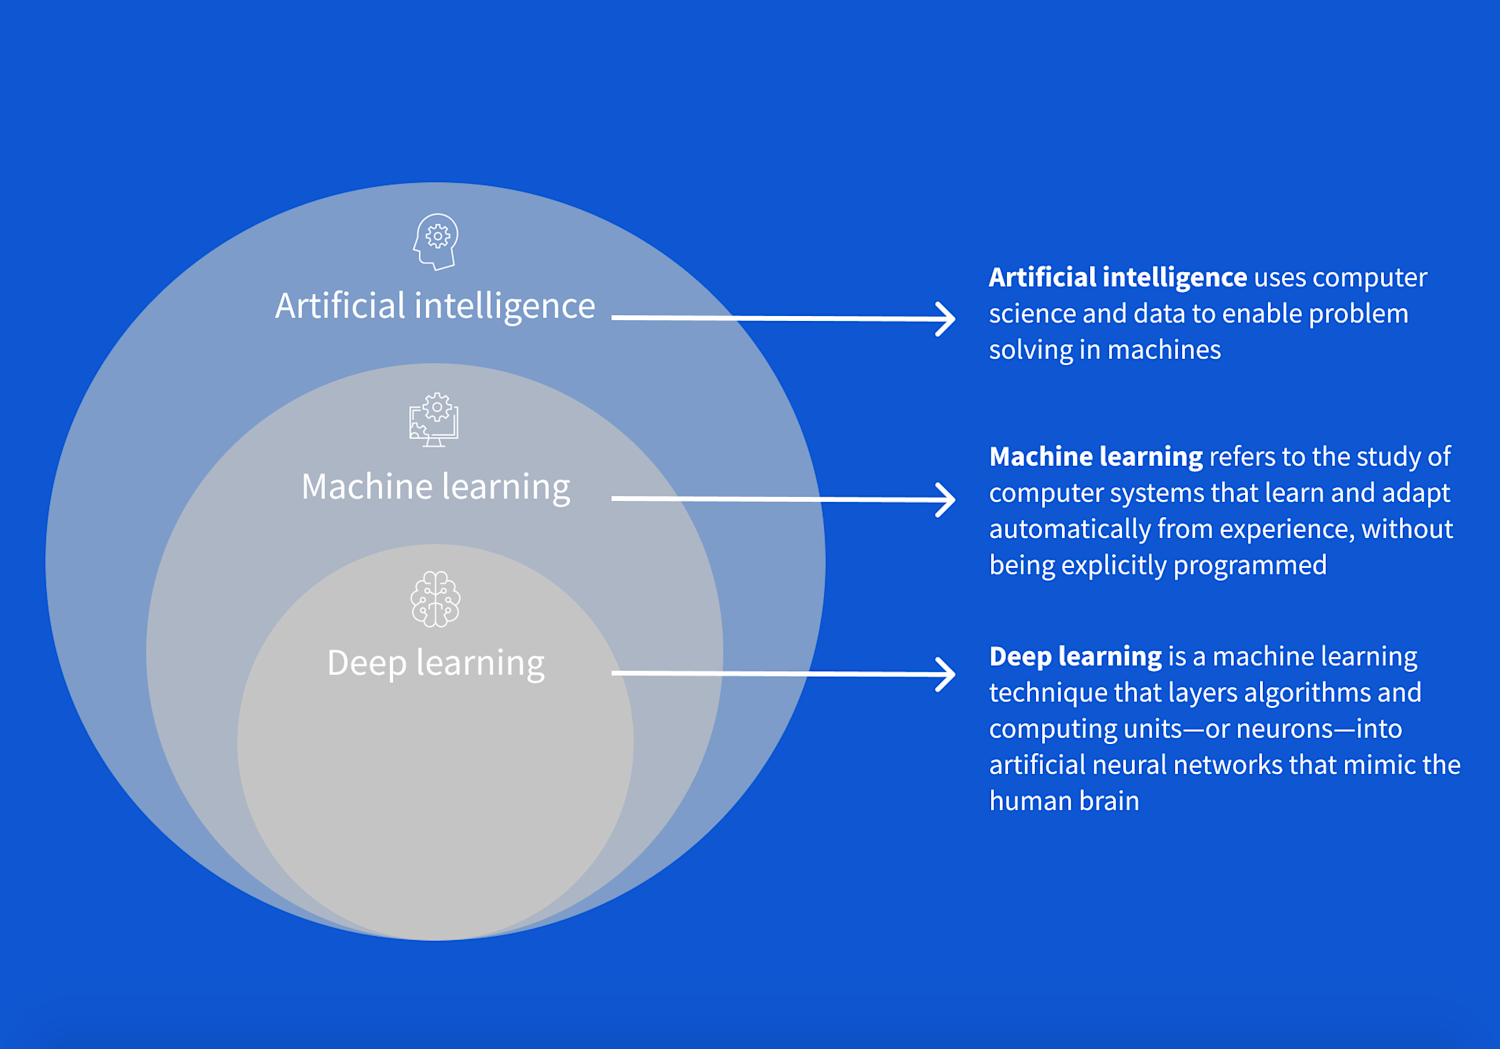

(Image Credit: [Coursera](https://www.coursera.org/articles/ai-vs-deep-learning-vs-machine-learning-beginners-guide))


## [2. Structured Data - Supervised Learning](#PartI)

The first part of the notebook demonstrates how to build **Supervised Learning Models** using structured data.



1. **Linear Regression**: A foundational model for regression tasks. Linear regression estimates the best-fitting line to predict continuous outcomes from one or more input variables. Its simplicity and interpretability make it a cornerstone for more advanced predictive models.
2. **Support Vector Classifier (SVC)**: Using the breast cancer dataset, a Support Vector Machine is trained to classify tumors as benign or malignant. This method constructs an optimal hyperplane that separates classes with maximum margin.
3. **CART (Decision Tree)**: A decision tree model is developed and visualized using the breast cancer dataset. This approach partitions the data based on feature splits, offering a clear and interpretable method for classification.
4. **K-Nearest Neighbors (KNN)**: Applied to the breast cancer dataset, KNN classifies observations based on the majority label among their nearest neighbors. While primarily used in supervised learning, it can also be adapted for unsupervised tasks.
5. **Artificial Neural Networks (ANN)**: Inspired by the structure of the human brain, ANNs consist of interconnected layers of nodes (neurons) that capture complex, non-linear patterns. They are particularly effective for classification tasks by learning weighted connections, and can be applied in both supervised and unsupervised contexts.




### 2.1 Linear Regression


Task: We want to analyze the `HospitalCosts.csv` dataset. We aim to predict total hospital charges (`TOTCHG`) based on patient data such as age, sex, and length of stay. The steps include:

1. Reading in the `HospitalCosts.csv` dataset.
2. Splitting the data into training and testing sets.
3. Building a linear regression model.
4. Evaluating the model's performance by making predictions and visualizing the results.

In [ ]:
# ================================
# Step-1: Problem Statement
# ================================
# Aim: predict hospital costs based on past data using a multiple linear regression model.
# Dependent variables: TOTCHG (Total Charge).
# Independent variable: AGE, FEMALE, LOS (Length of Stay), RACE, and APRDRG.


In [1]:
# ================================
# Step-2: Load & Read the Data File
# ================================
# Manually load the file "HospitalCosts.csv" in Colab before read it

# read.csv(file)
#   file: the path to the CSV file to import (here, "/content/HospitalCosts.csv").
#   return: a data frame containing the contents of the CSV file.
#   data: stores the dataset.
#   output: a data frame with rows = number of records, columns = variables in the CSV.
data <- read.csv("/content/HospitalCosts.csv")

# head(x, n = 6)
#   x: the object to preview (here, the 'data' data frame).
#   n: the number of rows to display (default = 6).
#   return: prints the first n rows of the dataset.
#   output: a table of the first 6 rows of 'data'.
head(data)


,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
,<int>,<int>,<int>,<int>,<int>,<int>
1,17,1,2,1,2660,560
2,17,0,2,1,1689,753
3,17,1,7,1,20060,930
4,17,1,1,1,736,758
5,17,1,1,1,1194,754
6,17,0,0,1,3305,347


In [2]:
# ================================
# Step-3: Train Test Split
# ================================

# Install and load the caTools package for splitting data.
install.packages('caTools')
library(caTools)

# Set the random seed to ensure the reproducibility of random processes.
set.seed(1)

# sample.split(Y, SplitRatio)
#   Y: a vector of outcomes to stratify the split (here, 'data$TOTCHG').
#   SplitRatio: proportion of data to go into the training set (here, 0.80).
#   return: a logical vector indicating TRUE (row goes to training) or FALSE (row goes to testing).
#   sample: stores TRUE/FALSE values for each row.
#   output: logical vector, e.g., c(TRUE, TRUE, FALSE, ...).
sample <- sample.split(data$TOTCHG, SplitRatio = 0.80)

# subset(x, condition)
#   x: the data frame to subset (here, 'data').
#   condition: logical condition selecting rows (here, sample == TRUE).
#   return: subset of rows from 'data' where condition is TRUE.
#   output: a data frame with ~80% of the rows.
train_data <- subset(data, sample == TRUE)
test_data <- subset(data, sample == FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# ================================
# Step-4-1: Model Building
# ================================

# Create a linear regression model (lm) using all independent variables.
# lm(formula, data)
#   formula: specifies the model to fit. 'TOTCHG ~ .' means TOTCHG is the dependent variable and all other variables are predictors.
#   data: the training dataset used for model fitting (here, 'train_data').
#   return: a fitted linear regression model object.
#   model: stores the regression model.
#   output: an object of class 'lm' containing coefficients, residuals, etc.
model <- lm(TOTCHG ~ ., data = train_data)


# Display the summary of the initial model.
# summary(object)
#   object: the fitted model (here, 'model').
#   return: a detailed summary including coefficients, R-squared, p-values, and residual statistics.
#   output: printed regression summary table with model performance metrics.
summary(model)



Call:
lm(formula = TOTCHG ~ ., data = train_data)

Residuals:
   Min     1Q Median     3Q    Max 
 -6027   -853   -159    146  42906 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5123.8780   618.0184   8.291 1.80e-15 ***
AGE          150.1851    21.2746   7.059 7.62e-12 ***
FEMALE      -343.0310   300.4870  -1.142    0.254    
LOS          789.1367    49.0452  16.090  < 2e-16 ***
RACE        -252.1402   273.3765  -0.922    0.357    
APRDRG        -7.8197     0.8176  -9.565  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2841 on 393 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.4897,	Adjusted R-squared:  0.4832 
F-statistic: 75.44 on 5 and 393 DF,  p-value: < 2.2e-16


In [4]:
# ================================
# Step-4-2: Model Rebuild
# ================================

# Based on the p-values from the summary, rebuild the model with only the significant variables (Age, LOS, and APRDRG).

# lm(formula, data)
#   formula: specifies the model. 'TOTCHG ~ AGE + LOS + APRDRG' means TOTCHG is the dependent variable
#            predicted using AGE, LOS, and APRDRG as independent variables.
#   data: the training dataset (here, 'train_data').
#   return: a fitted linear regression model object.
#   newModel: stores the regression model trained on selected predictors.
#   output: an object of class 'lm' with coefficients, residuals, etc.
newModel <- lm(TOTCHG ~ AGE + LOS + APRDRG, data = train_data)


In [5]:
# ================================
# Step-5: Assess the Fit - Statistics
# ================================

# Assess model fit
# summary(object)
#   object: an object for which a summary is desired.
summary(newModel)


Call:
lm(formula = TOTCHG ~ AGE + LOS + APRDRG, data = train_data)

Residuals:
   Min     1Q Median     3Q    Max 
 -6201   -873   -139    163  42864 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4801.1658   520.7266   9.220  < 2e-16 ***
AGE          144.7810    20.7931   6.963 1.39e-11 ***
LOS          789.4263    48.9385  16.131  < 2e-16 ***
APRDRG        -7.9746     0.7942 -10.042  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2838 on 396 degrees of freedom
Multiple R-squared:  0.4873,	Adjusted R-squared:  0.4834 
F-statistic: 125.4 on 3 and 396 DF,  p-value: < 2.2e-16


Interpretation of the statistics:

**Coefficients**:

1. Intercept (4801.17): When AGE, LOS, and APRDRG are zero, the expected value of the dependent variable is approximately 4801.
2. AGE (144.78): Each additional year of age is associated with an increase of about 145 units in the outcome, holding other variables constant. This effect is highly significant (p < 0.001).
3. LOS (789.43): Each additional day of hospital stay is associated with an increase of approximately 789 units in the outcome, controlling for AGE and APRDRG. This is also highly significant (p < 0.001).
4. APRDRG (-7.97): A one-unit increase in APRDRG score is associated with a slight decrease of about 8 units in the outcome, all else being equal. This effect is statistically significant (p < 0.001).

**Model Fit:**

1. Residual standard error: 2838, indicating the typical size of prediction errors.
2. R-squared: 0.4873, meaning that approximately 48.7% of the variation in the dependent variable is explained by AGE, LOS, and APRDRG.
3. Adjusted R-squared: 0.4834, which adjusts for the number of predictors.
4. F-statistic (125.4, p < 2.2e-16): The overall model is highly significant, suggesting that the predictors jointly explain a substantial portion of the variance in the outcome.


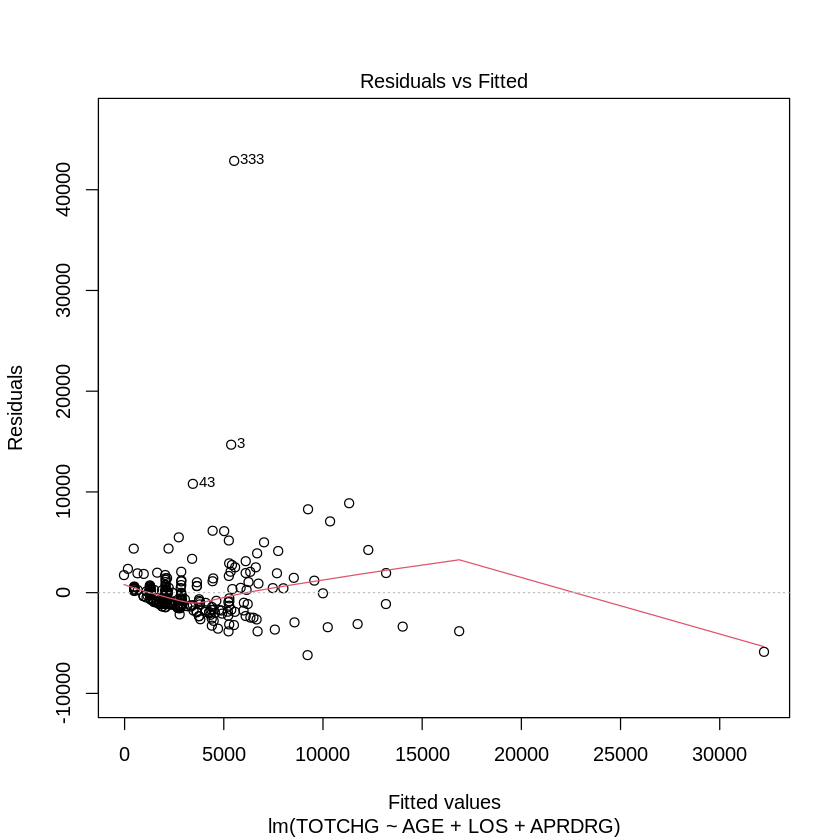

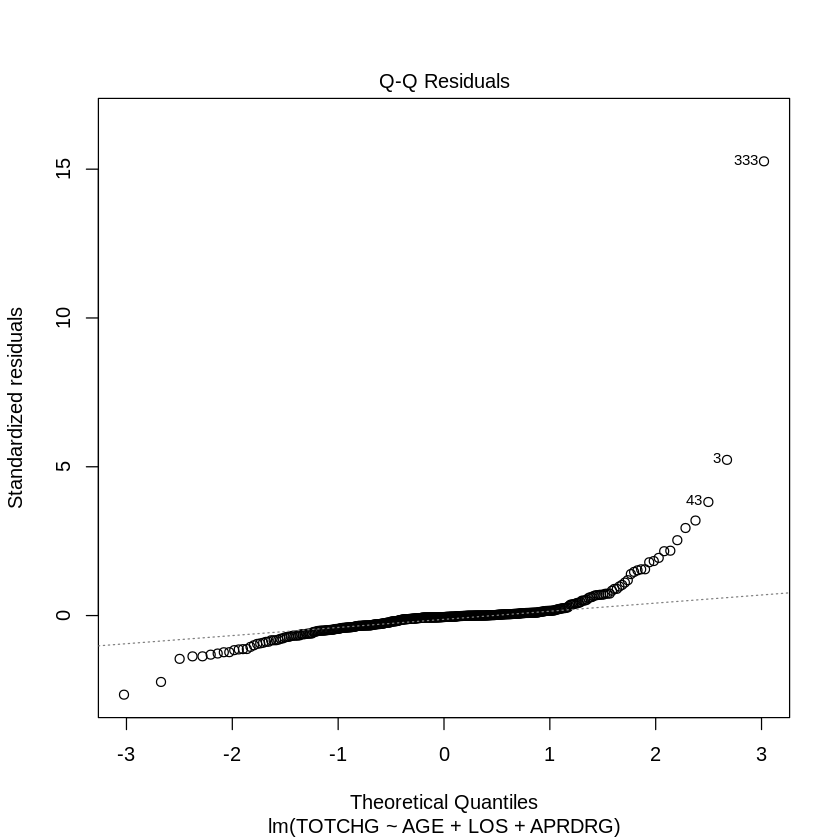

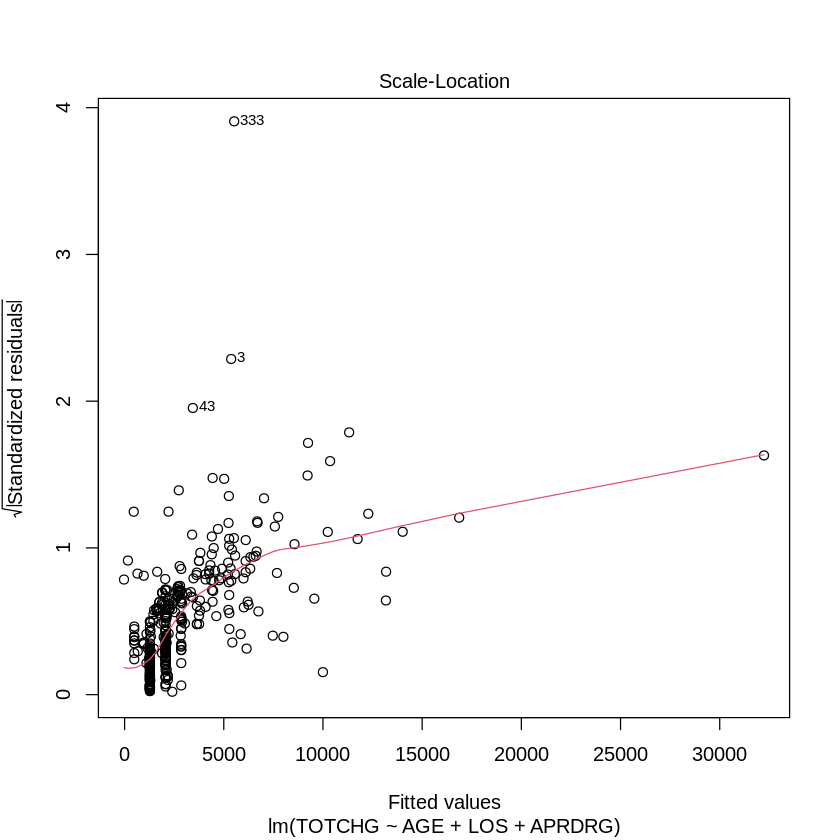

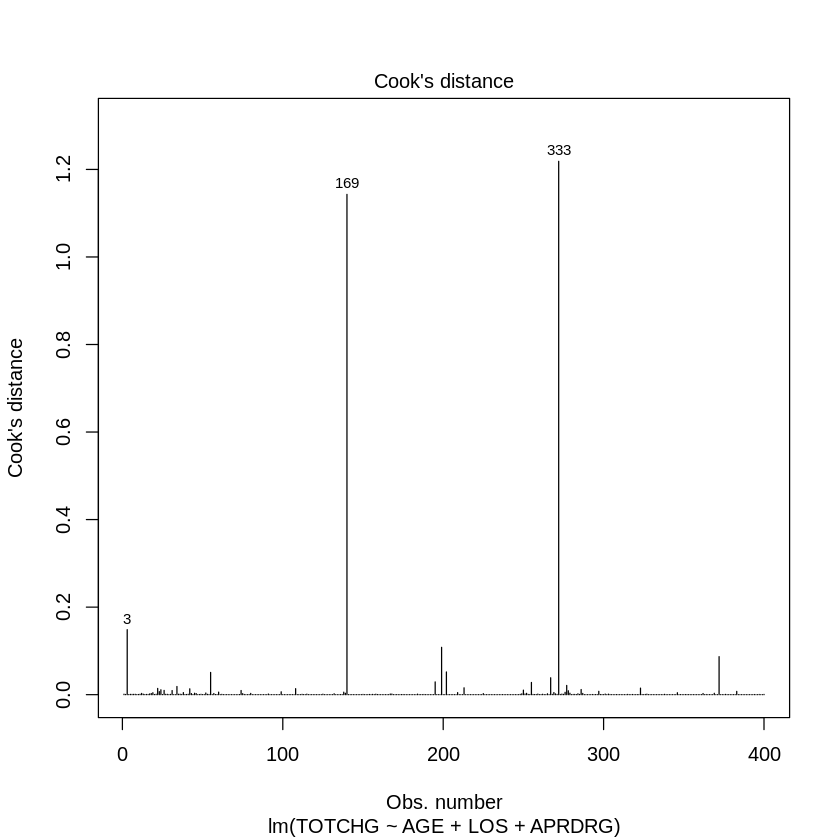

In [6]:
# ================================
# Step-6: Assess the Fit - Visual
# ================================

# plot(x, which)
#   x: the object to plot (here, 'newModel').
#   which = 1: creates a Residuals vs Fitted plot to check linearity and equal variance assumptions.
#   which = 2: creates a Normal Q-Q plot to check whether residuals are normally distributed.
#   which = 3: creates a Scale-Location plot to check homoscedasticity (spread of residuals).
#   which = 4: creates a Residuals vs Leverage plot to detect influential observations.
#   return: diagnostic plot displayed in the plotting window.
#   output: scatter plot of fitted values vs residuals.

plot(newModel, which = 1)
plot(newModel, which = 2)
plot(newModel, which = 3)
plot(newModel, which = 4)

In [7]:
# ================================
# Step-7: Prediction
# ================================

# Use the new model to make predictions on the test data.
# predict(object, newdata)
#   object: the fitted model (here, 'newModel').
#   newdata: the dataset on which to make predictions (here, 'test_data').
#   return: predicted values of TOTCHG for the new dataset.
#   TOTCHG_prediction: stores numeric predictions.
#   output: numeric vector of predicted hospital charges for each row in test_data.
TOTCHG_prediction <- predict(newModel, newdata = test_data)

# Create a data frame for the predictions and show the first few values.
# data.frame(..., row.names = NULL)
#   ...: data to convert into a data frame (here, 'TOTCHG_prediction').
#   return: a data frame containing the predictions.
#   TOTCHG_pred1: stores predictions in tabular format.
#   output: a one-column data frame with predicted TOTCHG values.
TOTCHG_pred1 <- data.frame(TOTCHG_prediction)

head(TOTCHG_pred1)

,TOTCHG_prediction
,<dbl>
4,2007.1552
6,4495.2721
7,4407.3322
18,3941.0909
21,997.4049
29,388.9155


In [8]:
# ================================
# Step-8: If we Have a Good Training Model
# ================================
# Overfitting and Generalization: comparing the performance on the training set vs testing set
# 1. Overfitting: A model that has a high training performance (e.g., high R-squared) but a low #    test performance (e.g., high RMSE) is likely overfitting. It has memorized the training data's #    noise and doesn't generalize well to new data.
# 2. Generalizing Well: A model with similar performance on both the training and test sets is #     generalizing well. This indicates a stable and reliable model.

# predict(object, newdata)
#   object: the fitted model (here, 'newModel').
#   newdata: the dataset on which to make predictions (here, 'test_data').
#   return: predicted values for the new dataset.
#   test_pred: stores predicted TOTCHG values for the test set.
#   output: numeric vector of predictions, one per row in test_data.
test_pred <- predict(newModel, newdata = test_data)

test_res <- test_data$TOTCHG - test_pred
MSE <- mean(test_res^2)
RMSE <- sqrt(MSE)

print(RMSE)

[1] 1492.014


### 2.2. SVM

> “Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However, it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the **hyper-plane** that differentiates the **two classes** very well (look at the below snapshot).



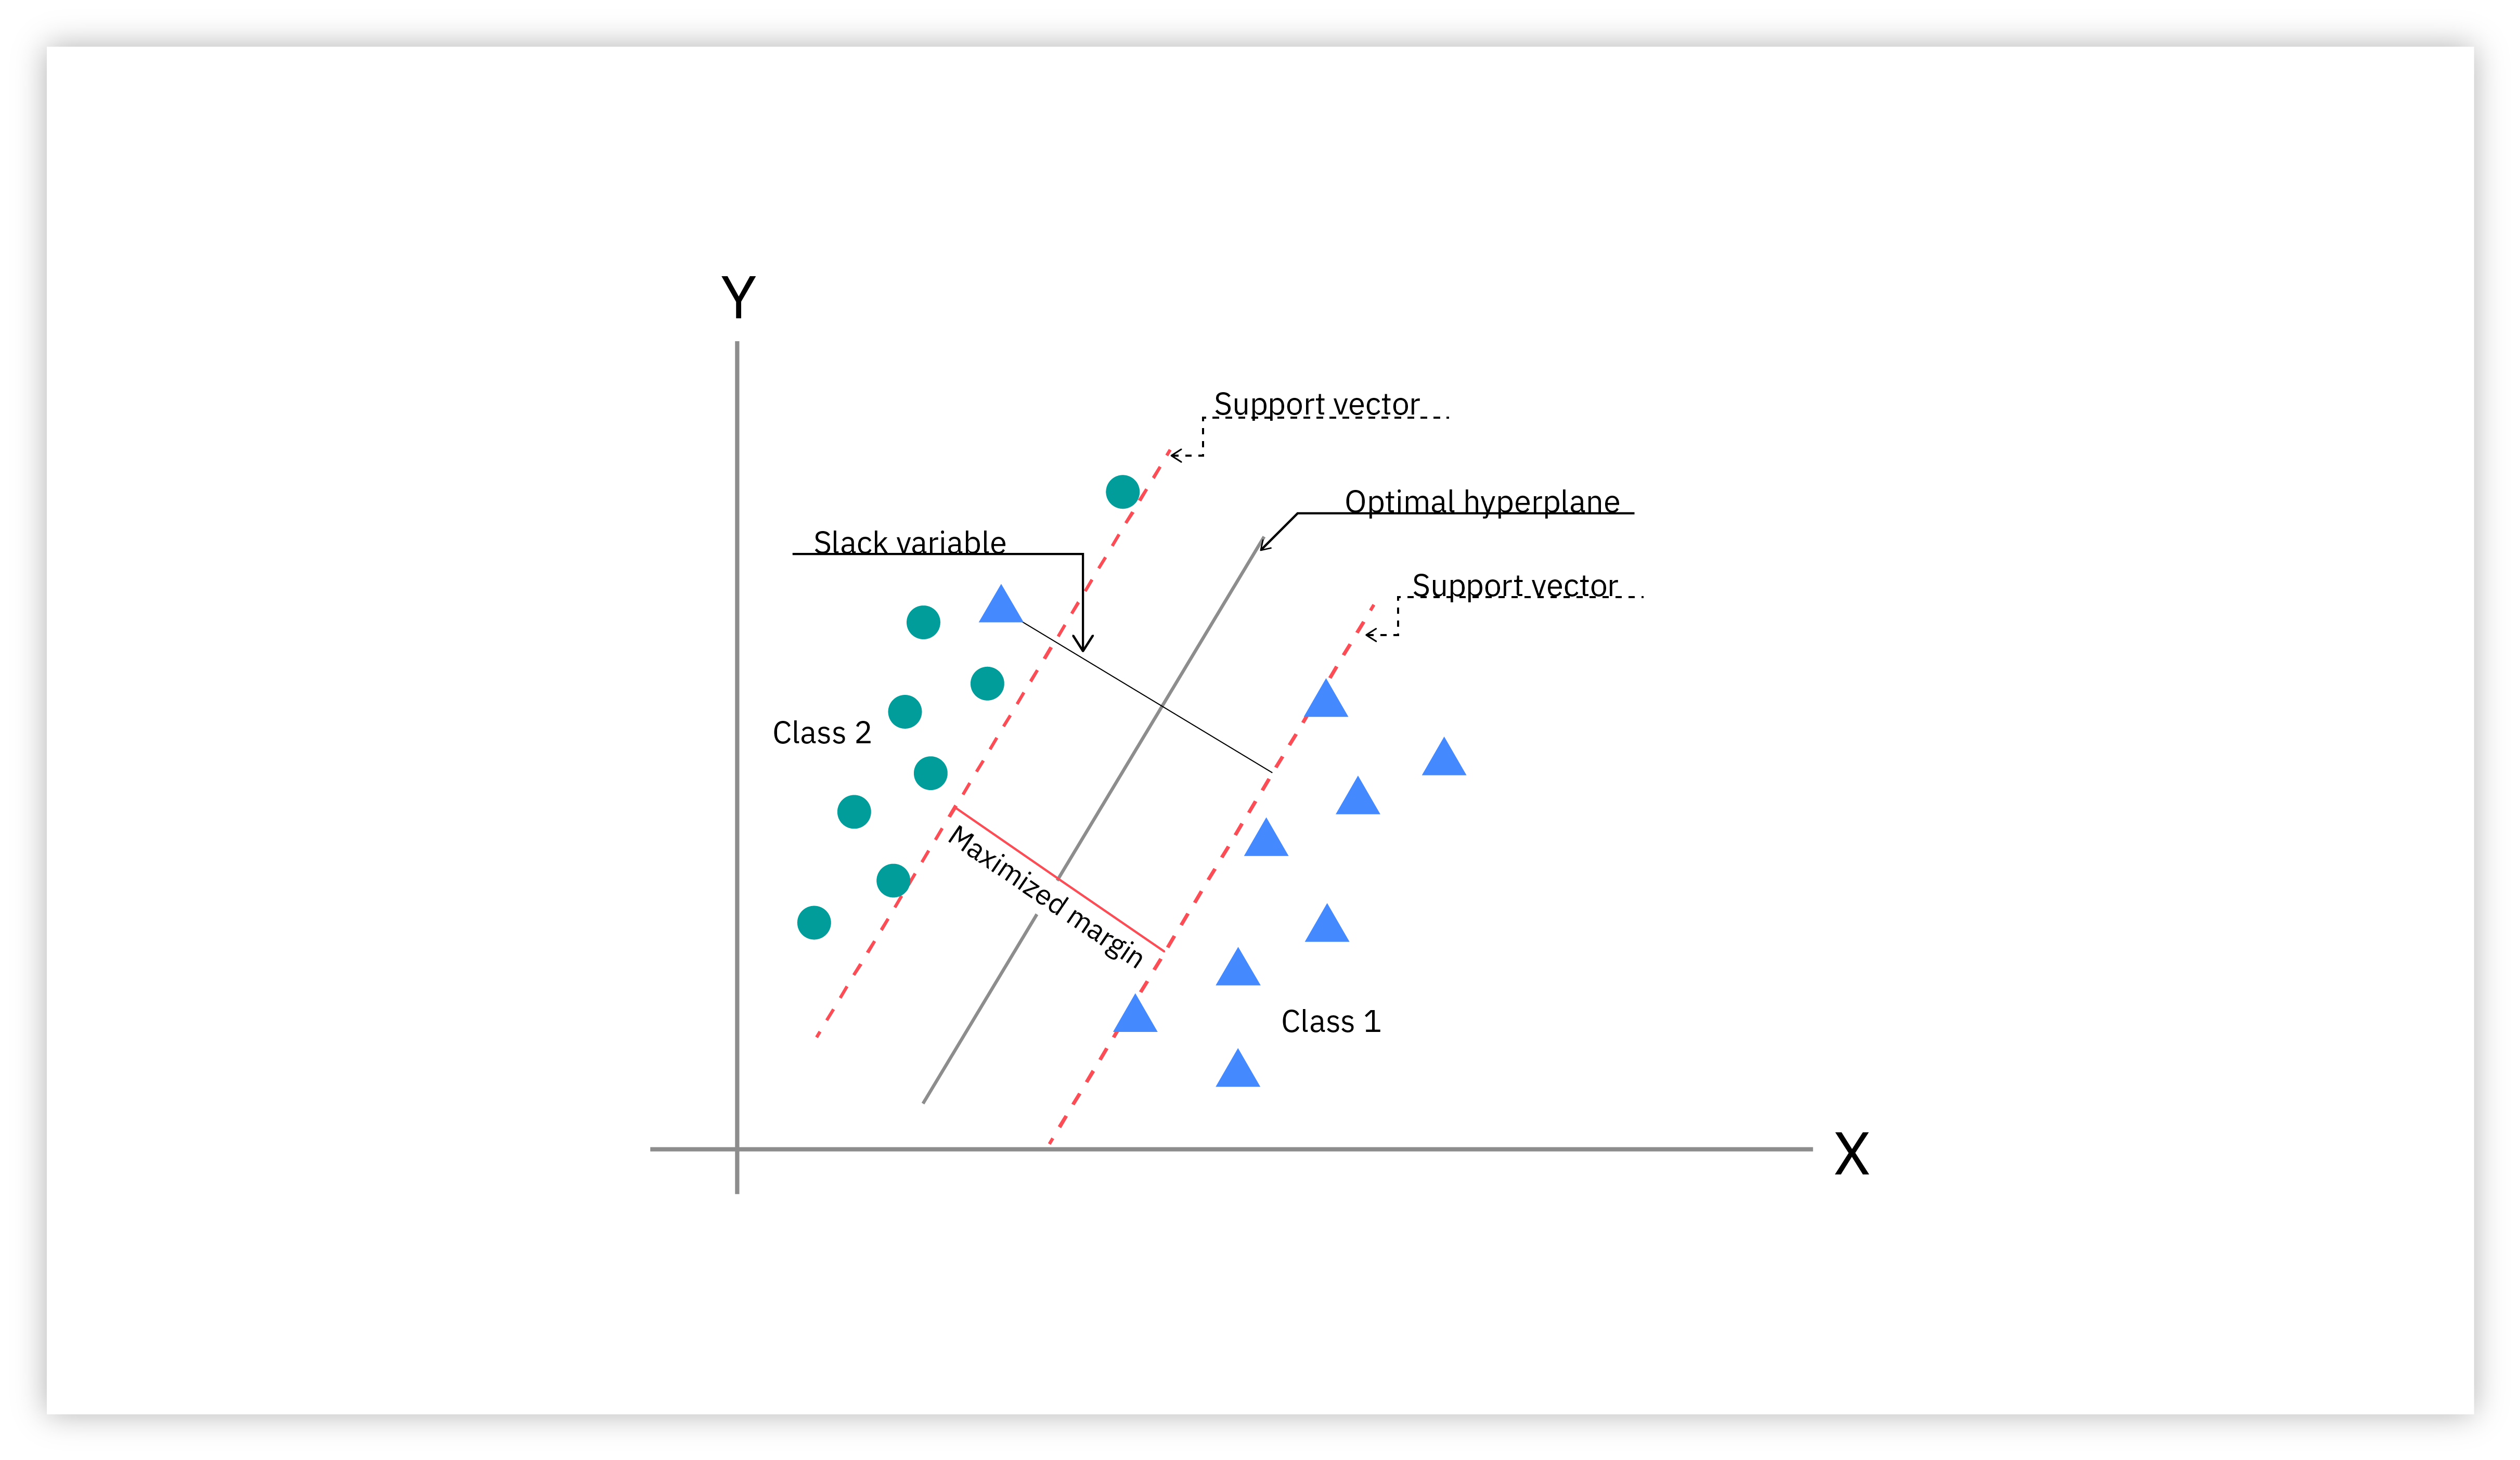



(Image credit: [IBM](https://www.ibm.com/think/topics/support-vector-machine#:~:text=How%20SVMs%20work-,What%20are%20SVMs%3F,in%20an%20N%2Ddimensional%20space.))


The objective is to predict a patient's diagnosis (malignant `M` or `B`) from biometric data in the `wisc_bc_data.csv`. The steps include:

1. Reading in the `wisc_bc_data.csv` dataset.
2. Splitting the data into training and testing sets.
3. Building a SVM model.
4. Evaluating the model's performance.

In [9]:
# ================================
# Step-1: Load and Read Data
# ================================

data1 <- read.csv("wisc_bc_data.csv", sep = ",", header = TRUE)
head(data1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,⋯,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
2,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,⋯,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
3,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,⋯,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
4,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,⋯,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
5,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,⋯,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
6,906539,B,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,⋯,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284


In [10]:
# ================================
# Step-2: Clean and split Data
# ================================
install.packages("caTools")
library(caTools)

# data[rows, columns]
#   rows: left blank, selects all rows.
#   columns: '-c(1)' removes the first column from data1.
#   return: subset of 'data1' with all rows and all columns except the first.
#   data: stores the modified dataset without the first column.
#   output: a data frame containing all original columns except the first one.
data <- data1[, -c(1)]
head(data)

# factor(x, levels, labels)
#   x: the vector to convert into a factor (here, 'data$diagnosis').
#   levels: the original categorical values in x (here, "M" and "B").
#   labels: numeric or alternative labels to assign to levels (here, 1 for "M" and 0 for "B").
#   return: a factor vector with specified numeric labels instead of original text.
#   data$diagnosis: updates the 'diagnosis' column to the new factor.
#   output: factor vector with values 1 or 0 corresponding to malignant ("M") and benign ("B").
data$diagnosis <- factor(data$diagnosis,
                      levels = c("M","B"),
                      labels = c(1,0))
head(data)


# normalize(x)
#   x: a numeric vector.
#   min(x): computes the minimum value in the vector.
#   max(x): computes the maximum value in the vector.
#   (x - min(x)) / (max(x) - min(x)): formula for min-max normalization, scaling all values to the range [0, 1].
#   return: returns the normalized vector.
#   output: numeric vector of the same length as x, with values scaled between 0 and 1.
normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}

# lapply(X, FUN)
#   X: a list or data frame subset (here, columns 2 through the last column of 'data').
#   FUN: function to apply to each element/column (here, 'normalize', which performs min-max scaling).
#   return: a list where each element is the normalized version of the corresponding column.
#   output: list of numeric vectors, each scaled to the range [0, 1].
#   note: to convert the list back to a data frame, wrap the expression in as.data.frame().
data[2: ncol(data)] <- as.data.frame(lapply(data[2: ncol(data)], normalize)) # do not normalize the 1st column
head(data)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,⋯,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
2,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,⋯,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
3,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,⋯,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
4,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,⋯,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
5,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,⋯,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
6,B,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,0.2031,⋯,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,⋯,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
2,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,⋯,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
3,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,⋯,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
4,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,⋯,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
5,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,⋯,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
6,0,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,0.2031,⋯,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0.2526859,0.0906324,0.2422777,0.13599152,0.4529205,0.1546838,0.09341612,0.18389662,0.4540404,⋯,0.1981501,0.09648188,0.1820808,0.08943669,0.4446279,0.09635106,0.09920128,0.3227148,0.2487680,0.08310376
2,0,0.1712812,0.3124789,0.1761454,0.08606575,0.3994764,0.2923747,0.14964855,0.13131213,0.4353535,⋯,0.1405194,0.29104478,0.1388017,0.05888714,0.3310440,0.21752966,0.15303514,0.2723711,0.2710428,0.13662600
3,0,0.1921056,0.2407846,0.1874784,0.09743372,0.4971563,0.1799276,0.07136832,0.12326044,0.3303030,⋯,0.1593739,0.38432836,0.1470193,0.07034015,0.4340619,0.11730749,0.08522364,0.2553608,0.2824759,0.15590975
4,0,0.2034644,0.1244505,0.2018520,0.10235419,0.5756974,0.2890007,0.10859888,0.23836978,0.3590909,⋯,0.1419424,0.09994670,0.1300862,0.06114825,0.4327412,0.15029446,0.06924121,0.2959107,0.1058545,0.08395645
5,0,0.3885182,0.1183632,0.3721927,0.24106045,0.2437483,0.1532421,0.07949859,0.13205765,0.3338384,⋯,0.2942014,0.09888060,0.2693859,0.15579532,0.2735918,0.14204771,0.10878594,0.2810309,0.1817465,0.08277581
6,0,0.2171896,0.3155225,0.2101444,0.11291622,0.2963799,0.1774124,0.12851453,0.07097416,0.4904040,⋯,0.1828531,0.39872068,0.1793914,0.08240759,0.3548174,0.16145181,0.20447284,0.2290034,0.2897694,0.18234291


In [11]:
# Split the data into training and testing sets.
set.seed(123)

sample <- sample.split(data$diagnosis, SplitRatio = 0.80)
train_set <- subset(data, sample == TRUE)
test_set <- subset(data, sample == FALSE)

head(train_set)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0.2526859,0.0906324,0.2422777,0.13599152,0.4529205,0.1546838,0.09341612,0.18389662,0.4540404,⋯,0.1981501,0.09648188,0.1820808,0.08943669,0.4446279,0.09635106,0.09920128,0.3227148,0.2487680,0.08310376
2,0,0.1712812,0.3124789,0.1761454,0.08606575,0.3994764,0.2923747,0.14964855,0.13131213,0.4353535,⋯,0.1405194,0.29104478,0.1388017,0.05888714,0.3310440,0.21752966,0.15303514,0.2723711,0.2710428,0.13662600
3,0,0.1921056,0.2407846,0.1874784,0.09743372,0.4971563,0.1799276,0.07136832,0.12326044,0.3303030,⋯,0.1593739,0.38432836,0.1470193,0.07034015,0.4340619,0.11730749,0.08522364,0.2553608,0.2824759,0.15590975
6,0,0.2171896,0.3155225,0.2101444,0.11291622,0.2963799,0.1774124,0.12851453,0.07097416,0.4904040,⋯,0.1828531,0.39872068,0.1793914,0.08240759,0.3548174,0.16145181,0.20447284,0.2290034,0.2897694,0.18234291
7,0,0.2143499,0.4808928,0.2123557,0.11028632,0.3609280,0.2537268,0.26054358,0.20402584,0.1656566,⋯,0.1618641,0.67004264,0.1587230,0.07102831,0.3871756,0.21772371,0.28993610,0.3317182,0.1078257,0.21172767
8,1,0.3232051,0.4748055,0.3301085,0.19270414,0.7192381,0.4828538,0.36504217,0.45606362,0.6015152,⋯,0.4009249,0.79504264,0.3889138,0.23785883,1.0000000,0.47890289,0.37108626,0.6917526,0.5651488,0.35130526


In [12]:
# ================================
# Step-3: Support Vector Classifier
# ================================

# Install and load the e1071 package for SVM.
install.packages('e1071')
library(e1071)

# Build the SVM model.
# svm(formula, data, type, kernel)
#   formula: specifies the model to fit. 'diagnosis ~ .' means 'diagnosis' is the dependent variable
#            and all other columns in 'train_set' are independent variables.
#   data: the dataset used for training (here, 'train_set').
#   type = 'C-classification': specifies that this is a classification problem (not regression).
#   kernel = 'linear': specifies that a linear decision boundary should be used.
#   return: a fitted SVM model object.
#   model: stores the trained SVM model.
#   output: an object of class 'svm' containing support vectors, coefficients, and model parameters.
model <- svm(diagnosis ~ .,
         train_set,
         type = 'C-classification',
         kernel = 'linear')

summary(model)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Call:
svm(formula = diagnosis ~ ., data = train_set, type = "C-classification", 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  35

 ( 20 15 )


Number of Classes:  2 

Levels: 
 1 0




In [13]:
# ================================
# Step-4: Prediction and Evaluation
# ================================
# Make predictions and create a confusion matrix for evaluation.

# 'caret': installs the 'caret' (Classification And REgression Training) package, which contains #  tools for model evaluation.
install.packages('caret')
library(caret)

pred <- predict(model, test_set)

# confusionMatrix(reference, data)
#   reference: the true class labels for the test dataset (here, test_set$diagnosis converted to factor).
#   data: the predicted class labels (here, pred converted to factor).
#   return: a confusion matrix object that summarizes classification performance.
#   output: prints a table showing counts of correct and incorrect predictions for each class.
#           also includes metrics such as accuracy, sensitivity, specificity, and more.
confusionMatrix(test_set$diagnosis, pred)

# True Positives (TP): The number of observations that were correctly classified as positive (e.g., correctly identified as malignant).
# True Negatives (TN): The number of observations that were correctly classified as negative (e.g., correctly identified as benign).
# False Positives (FP): The number of observations that were incorrectly classified as positive when they were actually negative (e.g., false alarms).
# False Negatives (FN): The number of observations that were incorrectly classified as negative when they were actually positive (e.g., missed diagnoses).


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: lattice



Confusion Matrix and Statistics

          Reference
Prediction  1  0
         1 40  2
         0  0 71
                                          
               Accuracy : 0.9823          
                 95% CI : (0.9375, 0.9978)
    No Information Rate : 0.646           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9617          
                                          
 Mcnemar's Test P-Value : 0.4795          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9726          
         Pos Pred Value : 0.9524          
         Neg Pred Value : 1.0000          
             Prevalence : 0.3540          
         Detection Rate : 0.3540          
   Detection Prevalence : 0.3717          
      Balanced Accuracy : 0.9863          
                                          
       'Positive' Class : 1               
                                    

Model looks good.

### 2.3. CART



> Classification And Regression Trees : Classification and Regression Trees or CART for short is a term introduced by Leo Breiman to refer to Decision Tree algorithms that can be used for classification or regression predictive modeling problems. <br>

> Classically, this algorithm is referred to as “decision trees”, but on some platforms like R they are referred to by the more modern term CART.<br>

> The CART algorithm provides a foundation for important algorithms like bagged decision trees, random forest and boosted decision trees. The representation for the CART model is a binary tree.<br>

> This is your binary tree from algorithms and data structures, nothing too fancy. Each root node represents a single input variable (x) and a split point on that variable (assuming the variable is numeric). The leaf nodes of the tree contain an output variable (y) which is used to make a prediction.

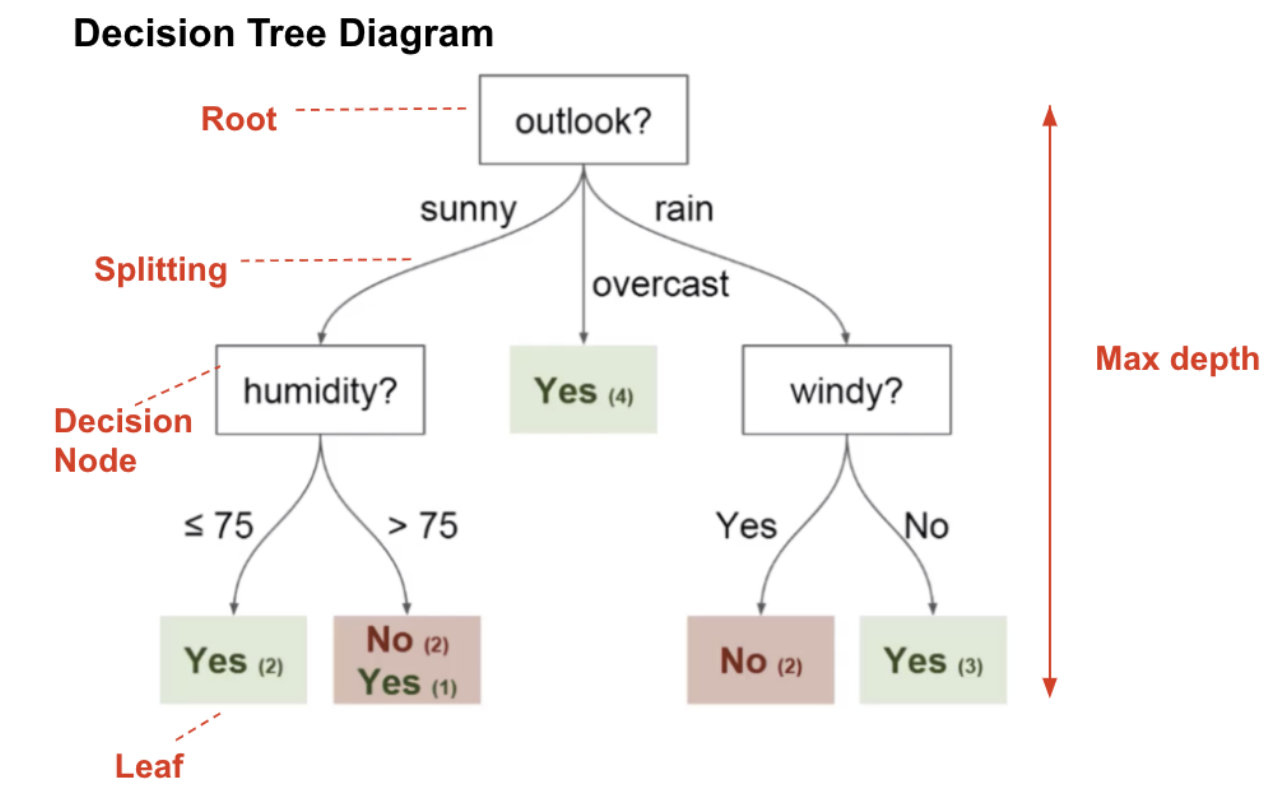



The objective is to predict a patient's diagnosis (malignant `M` or `B`) from biometric data in the `wisc_bc_data.csv`. The steps include:

1. Reading in the `wisc_bc_data.csv` dataset.
2. Splitting the data into training and testing sets.
3. Building a CART model.
4. Evaluating the model's performance.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



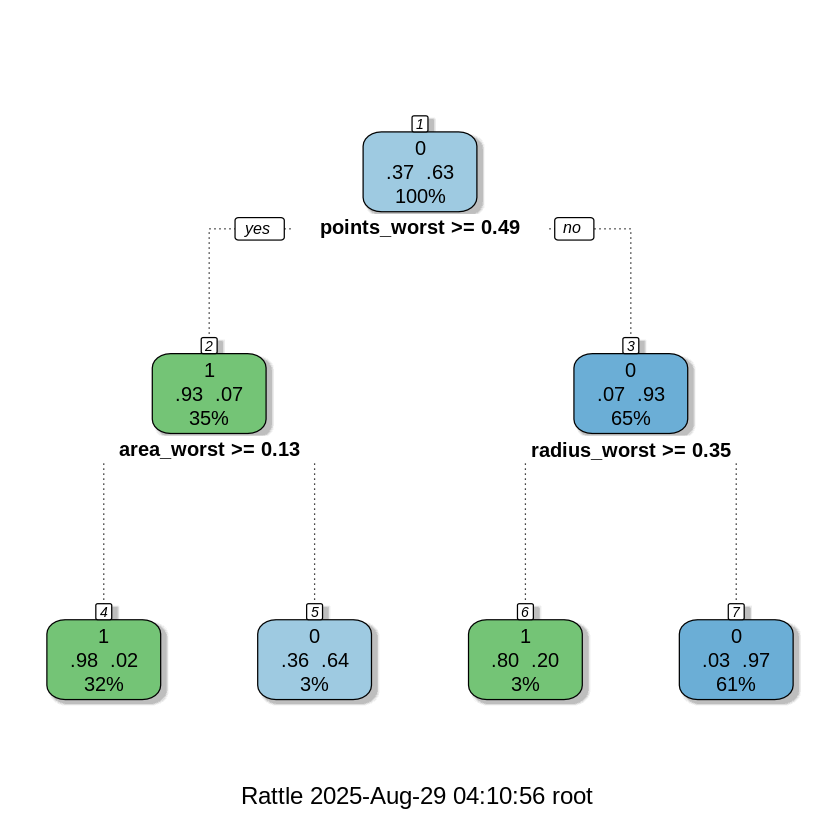

In [14]:
# ================================
# Step-1: Load and Read Data
# ================================
data1 <- read.csv("wisc_bc_data.csv", sep = ",", header = TRUE)

# ================================
# Step-2: Clean and split Data
# ================================

# If you have run the previous cells, you do not need to install or load the package caTools.
install.packages("caTools")
library(caTools)

data <- data1[, -c(1)]
data$diagnosis <- factor(data$diagnosis,
                      levels = c("M","B"),
                      labels = c(1,0))

normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}

data[2: ncol(data)] <- as.data.frame(lapply(data[2: ncol(data)], normalize))

set.seed(123)

sample <- sample.split(data$diagnosis, SplitRatio = 0.80)
train_set <- subset(data, sample == TRUE)
test_set <- subset(data, sample == FALSE)

# ================================
# Step-3: CART: Decision Trees
# ================================

# Install and load the rpart and rattle packages for decision trees.
# 'rpart' (Recursive Partitioning and Regression Trees) package, which is used for building decision trees.

install.packages('rpart')
library(rpart)
install.packages('rattle')
library(rattle)
library(rpart.plot)

# rpart(formula, data)
#   formula: specifies the model to fit. 'diagnosis ~ .' means 'diagnosis' is the dependent variable
#            and all other columns in 'train_set' are independent variables.
#   data: the dataset used for training (here, 'train_set').
#   return: a fitted CART (Classification and Regression Tree) model object.
#   model_cart: stores the trained decision tree model.
#   output: an object of class 'rpart' containing the tree structure, split rules, and fitted values.
model_cart <- rpart(diagnosis ~ ., data = train_set)

# Plot the decision tree model.
fancyRpartPlot(model_cart)


In [15]:
# ================================
# Step-4: Evaluation
# ================================
# Make predictions and create a confusion matrix for evaluation.

# If you have run the previous cells, you do not need to install or load the package caret.
install.packages("caret")
library(caret)

pred_cart <- predict(model_cart, test_set, type = "class")
confusionMatrix(test_set$diagnosis, pred_cart)

# summary(model_cart)

Confusion Matrix and Statistics

          Reference
Prediction  1  0
         1 35  7
         0  1 70
                                          
               Accuracy : 0.9292          
                 95% CI : (0.8653, 0.9689)
    No Information Rate : 0.6814          
    P-Value [Acc > NIR] : 2.078e-10       
                                          
                  Kappa : 0.8439          
                                          
 Mcnemar's Test P-Value : 0.0771          
                                          
            Sensitivity : 0.9722          
            Specificity : 0.9091          
         Pos Pred Value : 0.8333          
         Neg Pred Value : 0.9859          
             Prevalence : 0.3186          
         Detection Rate : 0.3097          
   Detection Prevalence : 0.3717          
      Balanced Accuracy : 0.9407          
                                          
       'Positive' Class : 1               
                                    

Model looks good.

### 2.4. KNN

> KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry.

> To evaluate any technique we generally look at 3 important aspects:
> - Ease to interpret output
> - Calculation time
> - Predictive Power

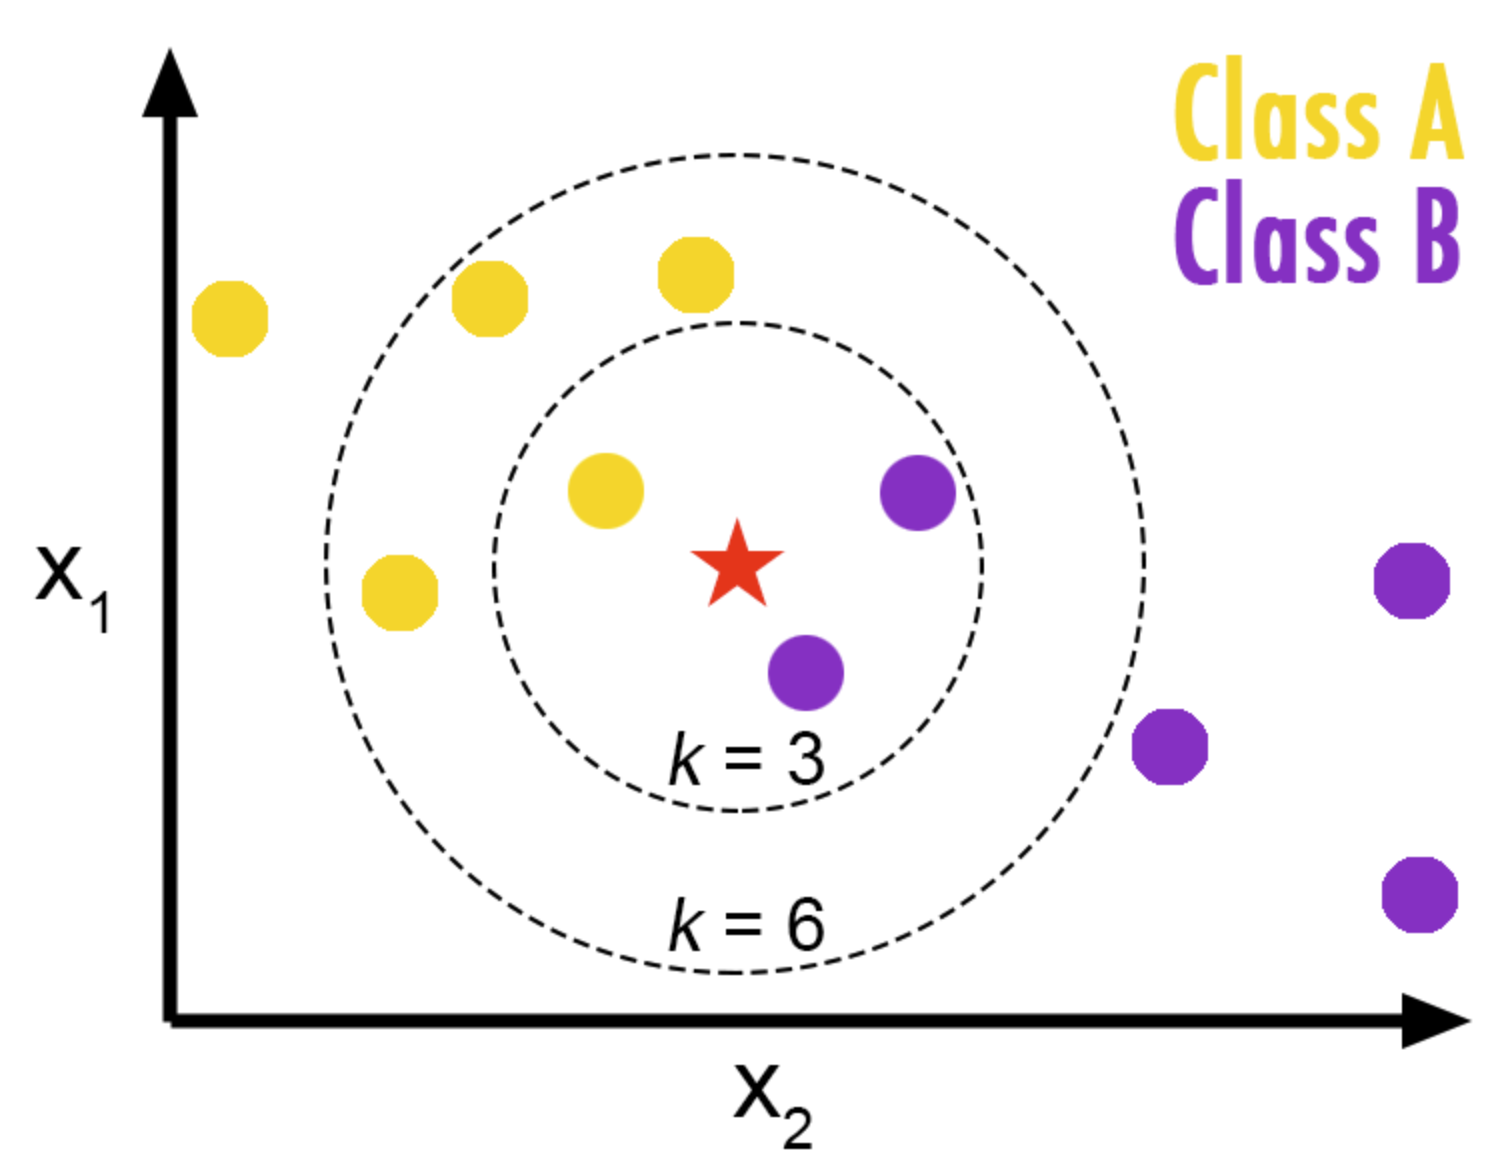

The objective is to predict a patient's diagnosis (malignant `M` or `B`) from biometric data in the `wisc_bc_data.csv`. The steps include:

1. Reading in the `wisc_bc_data.csv` dataset.
2. Splitting the data into training and testing sets.
3. Building a KNN model.
4. Evaluating the model's performance.

In [16]:
# ================================
# Step-1: Load and Read Data (Done)
# ================================
data1 <- read.csv("wisc_bc_data.csv", sep = ",", header = TRUE)

# ================================
# Step-2: Clean and split Data (Done)
# ================================

# If you have run the previous cells, you do not need to install or load the package caTools.
install.packages("caTools")
library(caTools)
data <- data1[, -c(1)]


data$diagnosis <- factor(data$diagnosis,
                      levels = c("M","B"),
                      labels = c(1,0))

normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}

data[2: ncol(data)] <- as.data.frame(lapply(data[2: ncol(data)], normalize))



set.seed(123)

sample <- sample.split(data$diagnosis, SplitRatio = 0.80)
train_set <- subset(data, sample == TRUE)
test_set <- subset(data, sample == FALSE)

# Split-v1
# # sample(x, size)
# #   x: the population to sample from. Here, 1:nrow(data) generates row indices from 1 to the number of rows in 'data'.
# #   size: number of items to sample. Here, 0.8 * nrow(data) means selecting 80% of the rows.
# #   return: a vector of randomly selected row indices for the training set.
# #   train_indices: stores the selected indices.
# #   output: a numeric vector of row indices, e.g., c(5, 12, 87, ...).

# set.seed(123)
# train_indices <- sample(1:nrow(data), size = 0.8 * nrow(data))

# # data[rows, columns]
# #   rows: specifies which rows to select. Here, 'train_indices' picks training rows.
# #   columns: left blank, so all columns are selected.
# #   return: subset of 'data' containing training rows.
# #   wbcd_train: the training dataset.
# #   output: a data frame with ~80% of the rows of 'data'.
# wbcd_train <- data[train_indices, ]
# wbcd_train_labels <- data1[train_indices, 2]

# # data[rows, columns]
# #   rows: '-train_indices' means all rows *except* the training indices.
# #   columns: left blank, so all columns are selected.
# #   return: subset of 'data' containing testing rows.
# #   wbcd_test: the testing dataset.
# #   output: a data frame with ~20% of the rows of 'data'.
# wbcd_test <- data[-train_indices, ]
# wbcd_test_labels <- data1[-train_indices, 2]

# Split-v2

wbcd_train <- train_set[, -c(1)]
wbcd_train_labels <- train_set$diagnosis

wbcd_test <- test_set[, -c(1)]
wbcd_test_labels <- test_set$diagnosis

In [17]:
# ================================
# Step-3: KNN
# ================================

# Install and load the class and caret packages for KNN.
# The "class" package provides functions for performing various classification tasks, including k-nearest neighbors (K-NN) classification.
# K-NN is a popular classification algorithm that classifies an observation based on the majority class of its k nearest neighbors in the feature space
# The "class" package provides tools to implement and customize K-NN classification in R

install.packages('class')
library(class)

# If you have run the previous cells, you do not need to install or load the package caret.
install.packages('caret')
library(caret)

# Build the KNN model and make predictions.

# knn(train, test, cl, k)
#   train: the training dataset (predictor variables) used to "learn" class boundaries.
#   test: the testing dataset (predictor variables) to be classified.
#   cl: a factor vector of class labels corresponding to the training dataset (here, wbcd_train_labels).
#   k: the number of nearest neighbors to consider when assigning a class (here, 21).
#   return: a factor vector of predicted class labels for each observation in the test set.
#   wbcd_test_pred: stores the predicted labels for the test data.
#   output: a vector (factor) with predicted classes, one for each row in wbcd_test.
wbcd_test_pred <- knn(train = wbcd_train,
                      test = wbcd_test,
                      cl = wbcd_train_labels,
                      k = 20)

# Create a confusion matrix for evaluation.
confusionMatrix(wbcd_test_labels, wbcd_test_pred)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Confusion Matrix and Statistics

          Reference
Prediction  1  0
         1 35  7
         0  0 71
                                          
               Accuracy : 0.9381          
                 95% CI : (0.8765, 0.9747)
    No Information Rate : 0.6903          
    P-Value [Acc > NIR] : 1.062e-10       
                                          
                  Kappa : 0.8627          
                                          
 Mcnemar's Test P-Value : 0.02334         
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9103          
         Pos Pred Value : 0.8333          
         Neg Pred Value : 1.0000          
             Prevalence : 0.3097          
         Detection Rate : 0.3097          
   Detection Prevalence : 0.3717          
      Balanced Accuracy : 0.9551          
                                          
       'Positive' Class : 1               
                                    

### 2.5. ANN

> Artificial neural networks are one of the main tools used in machine learning.  

> As the “neural” part of their name suggests, they are brain-inspired systems which are intended to replicate the way that we humans learn.

> Neural networks consist of input and output layers, as well as (in most cases) a hidden layer consisting of units that transform the input into something that the output layer can use. ANNs can be structured as shallow networks or as deep networks when composed of multiple hidden layers.

> They are excellent tools for finding patterns which are far too complex or numerous for a human programmer to extract and teach the machine to recognize.

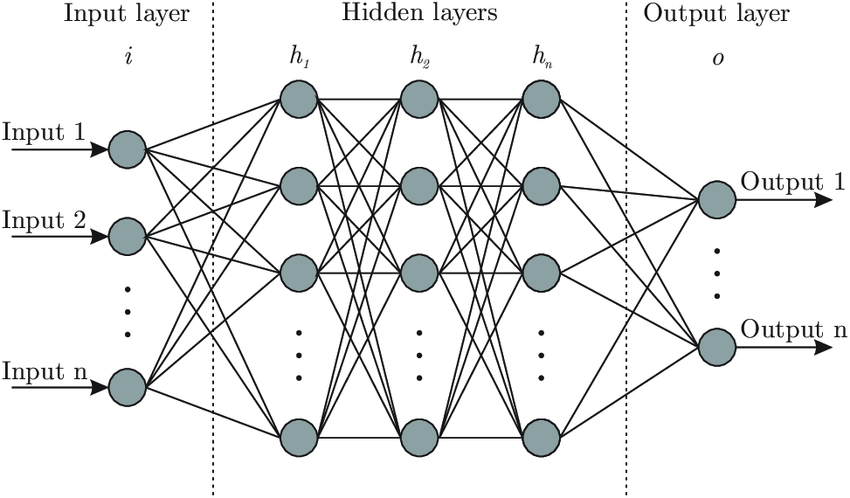

Source: [Research Gate](https://www.researchgate.net/figure/Artificial-neural-network-architecture-ANN-i-h-1-h-2-h-n-o_fig1_321259051)

Task: We want to analyze the `concrete.csv` dataset. We aim to predict concerte strength (`strength`) based on features such as cement, ash, water. The steps include:

1. Reading in the `concrete.csv` dataset.
2. Splitting the data into training and testing sets.
3. Building an ANN model.
4. Evaluating the model's performance.

In [19]:
# ================================
# Step-1: Load, Read Data
# ================================

concrete <- read.csv("concrete.csv")
head(concrete)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
2,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
3,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
4,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
5,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
6,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86


In [20]:
# ================================
# Step-2: Train Test Split
# ================================

set.seed(123)
# train_indices <- sample(1:nrow(concrete_norm), size = 0.8 * nrow(concrete_norm))

# concrete_train <- concrete_norm[train_indices,]
# concrete_test <- concrete_norm[-train_indices,]

sample <- sample.split(concrete$strength, SplitRatio = 0.80)

concrete_train <- subset(concrete, sample == TRUE)
concrete_test <- subset(concrete, sample == FALSE)

normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}

concrete_train_norm <- as.data.frame(lapply(concrete_train, normalize))
concrete_test_norm <- as.data.frame(lapply(concrete_test, normalize))

In [21]:
# ================================
# Step-3: Train ANN
# ================================

install.packages("neuralnet")
library(neuralnet)

# neuralnet(formula, data, hidden)
#   formula: specifies the model. 'strength ~ .' means 'strength' is the dependent variable
#            and all other columns in 'concrete_train' are independent variables.
#   data: the dataset used for training (here, 'concrete_train').
#   hidden: vector specifying the number of neurons in each hidden layer (here, one hidden layer with 4 neurons).
#   return: a fitted neural network model object.
#   model: stores the trained neural network.
#   output: object of class 'nn' containing network weights, structure, and fitted values for each training observation.

nn_model <- neuralnet(strength~. , concrete_train_norm, hidden = c(4))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [22]:
# ================================
# Step-3: Prediction
# ================================

# Predict using the trained neural network
# compute(nn, covariate_data)
#   nn: a trained neural network object (here, 'nn_model').
#   covariate_data: the input features for prediction (here, all columns except the dependent variable, '-n').
#   $net.result: extracts the predicted values from the neural network output.
#   pred: stores the raw predictions (scaled if the dependent variable was normalized).
#   output: numeric vector or matrix of predicted values for the test set.

pred <- compute(nn_model, concrete_test_norm[, -ncol(concrete_test_norm)])$net.result

# If dependent variable was scaled, rescale predictions back
# rescale(x, orig)
#   x: normalized predictions.
#   orig: original values of the dependent variable (before normalization).
#   formula: reverses min-max normalization to recover original scale.
#   return: predictions in the original scale.
#   output: numeric vector of rescaled predictions.
rescale <- function(x, orig) {
                (x * (max(orig) - min(orig))) + min(orig)
                }
pred_rescaled <- rescale(pred, concrete_test$strength)

# actual: stores true values of the dependent variable from the test set.
#   output: numeric vector of actual strengths.
actual <- concrete_test[, ncol(concrete_test_norm)]

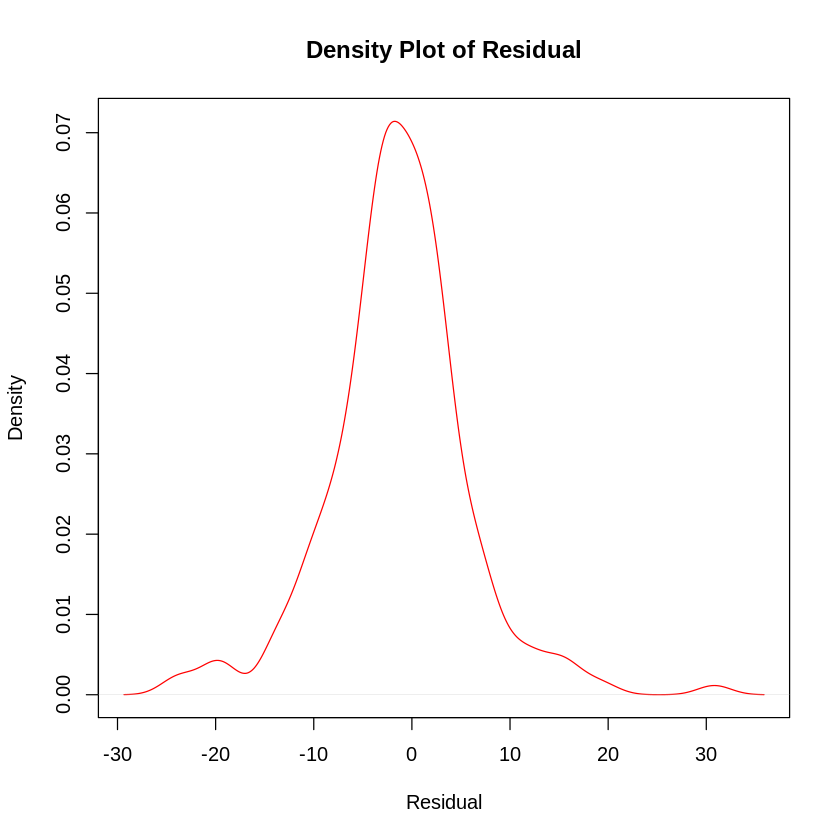

In [23]:
# ================================
# Step-4: Evaluation - Visual
# ================================

plot(density(actual - pred_rescaled),col = 'red',
    xlab = 'Residual',
    ylab = 'Density',
    main = 'Density Plot of Residual')

In [24]:
# ================================
# Step-4: Evaluation
# ================================

# Mean Squared Error (MSE)
# (pred_rescaled - actual)^2: squared errors between predicted and actual values.
# mean(...): computes the average squared error.
# mse: stores the Mean Squared Error.
#   output: single numeric value indicating average squared deviation.
mse  <- mean((pred_rescaled - actual)^2)


# Root Mean Squared Error (RMSE)
# sqrt(mse): square root of MSE.
# rmse: stores the Root Mean Squared Error.
#   output: numeric value reflecting average prediction error in original units.
rmse <- sqrt(mse)

# Mean Absolute Error (MAE)
# abs(pred_rescaled - actual): absolute differences between predictions and actual values.
# mean(...): computes average absolute error.
# mae: stores the Mean Absolute Error.
#   output: numeric value indicating average magnitude of errors.
mae  <- mean(abs(pred_rescaled - actual))
r2   <- 1 - sum((pred_rescaled - actual)^2) / sum((actual - mean(actual))^2)

print(c(mse, rmse, mae, r2))

[1] 53.0475654  7.2833760  5.2360185  0.7969362


## [3. Structured Data - Unsupervised Learning](#PartII)

1. **K-Nearest Neighbors (KNN)**: In an unsupervised setting, KNN can be used to group data points by examining their proximity to others without relying on labeled outcomes. This allows the algorithm to uncover natural clusters or structures within the data based solely on similarity.

2. **Artificial Neural Networks (ANN)**: Neural networks can also be adapted for unsupervised learning, such as through autoencoders or self-organizing maps. In this setting, the model learns hidden representations and patterns from unlabeled data, capturing complex and non-linear relationships that are not immediately apparent.

## [4. Unstructured Data - Supervised Learning](#PartIII)

The third part of the notebook demonstrates how to build and evaluate text data using Naive Bayes.

**Naive Bayes**: It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.



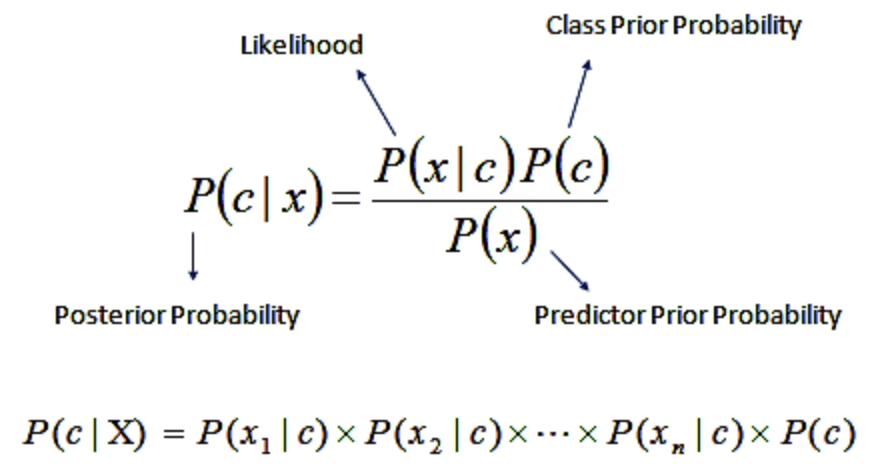

Task: We want to analyze the `sms_spam.csv` dataset. We aim to build a Naive Bayes model to classify messages as either "spam" or "not spam" based on their text content. The steps include:

1. Reading in the `sms_spam.csv` dataset.
2. Preprocessing the data.
3. Building a Navie Bayes model.
4. Evaluating the model's performance by making predictions and visualizing the results.

In [25]:
# ================================
# Step-1: Load and Read Data
# ================================

# The stringsAsFactors = FALSE argument ensures that character vectors in the data frame are not automatically converted to factors
# This is useful when you want to work with text data as-is, without converting it to factors.

sms_raw <- read.csv("sms_spam.csv", stringsAsFactors = FALSE)

head(sms_raw)


,type,text
,<chr>,<chr>
1,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
4,ham,U dun say so early hor... U c already then say...
5,ham,"Nah I don't think he goes to usf, he lives around here though"
6,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"


In [26]:
# ================================
# Step-2: Clean and split Data
# ================================

# convert the "type" column in the sms_raw data frame to a factor
# as.factor() is used to perform the conversion
# By converting the "type" column to a factor, you are likely preparing the data for a classification task where "type" represents the class labels

sms_raw$type <- as.factor(sms_raw$type)

In [27]:
# ================================
# Step-3: Install and load packages
# ================================

# The "tm" package provides a set of tools and functions for performing text mining and text analysis tasks
# Text mining involves extracting meaningful insights and information from unstructured text data

install.packages('tm')
library(tm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’, ‘BH’


Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate




In [28]:
# ================================
# Step-4: createa a "VCorpus" object
# ================================
# corpus (a collection of text documents) in the "tm" package

# The "V" in "VCorpus" stands for "Vector," indicating that it is a corpus created from a vector of text data
# VCorpus(VectorSource(x))
#   VectorSource(x): treats the input vector 'x' as a source of text documents (here, 'sms_raw$text').
#   VCorpus(): creates a volatile corpus from the text source.
#   return: a text corpus object suitable for text mining and preprocessing.
#   sms_corpus: stores the corpus containing all SMS messages from 'sms_raw'.
#   output: a VolatileCorpus object where each element represents one SMS message as a text document.
sms_corpus <- VCorpus(VectorSource(sms_raw$text))

# lapply(X, FUN)
#   X: a list or vector to iterate over (here, the first 3 documents of 'sms_corpus').
#   FUN: function to apply to each element (here, 'as.character', which converts each text document to a character string).
#   return: a list where each element is the text of the corresponding document as a character vector.
#   output: a list of character strings representing the content of the first 3 SMS messages in the corpus.
lapply(sms_corpus[1:3], as.character)

$`1`
[1] "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."

$`2`
[1] "Ok lar... Joking wif u oni..."

$`3`
[1] "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

### 4.1. Preprocess Text Data

In [29]:
# ================================
# Step-5: Text Cleaning
# ================================

# Transform to lowercase
# tm_map(x, FUN)
#   x: a text corpus to transform (here, 'sms_corpus').
#   FUN: a transformation function applied to each document (here, 'content_transformer(tolower)' converts text to lowercase).
#   return: a new corpus with the applied transformation.
#   sms_corpus_clean: stores the corpus with all text converted to lowercase.
#   output: VolatileCorpus object with all SMS messages in lowercase.

sms_corpus_clean <- tm_map(sms_corpus, content_transformer(tolower))


# Remove Numbers
# tm_map(x, FUN)
#   x: the corpus to transform (here, 'sms_corpus_clean').
#   FUN: 'removeNumbers' removes all numeric characters from the text.
#   return: a new corpus with numbers removed.
#   sms_corpus_clean: updated corpus without numbers.
#   output: VolatileCorpus object with numeric characters removed from all messages.

sms_corpus_clean <- tm_map(sms_corpus_clean, removeNumbers)

# Removing StopWords
# tm_map(x, FUN, )
#   x: the corpus to transform (here, 'sms_corpus_clean').
#   FUN: 'removeWords' removes specified words.
#   ...: additional arguments; here, 'stopwords()' provides a list of common stopwords in English.
#   return: a new corpus with stopwords removed.
#   sms_corpus_clean: updated corpus without stopwords.
#   output: VolatileCorpus object with common English stopwords removed.

sms_corpus_clean <- tm_map(sms_corpus_clean, removeWords, stopwords())

# Removing Punctuation
# tm_map(x, FUN)
#   x: the corpus to transform (here, 'sms_corpus_clean').
#   FUN: 'removePunctuation' removes all punctuation marks from the text.
#   return: a new corpus with punctuation removed.
#   sms_corpus_clean: updated corpus without punctuation.
#   output: VolatileCorpus object with punctuation removed from all messages.
sms_corpus_clean <- tm_map(sms_corpus_clean, removePunctuation)



In [30]:
# ================================
# Step-6: Stemming
# ================================
# The purpose of stemming is to reduce words to their common root form or stem. By doing this, stemming helps group together different forms of the same word so they can be analyzed as a single item.

install.packages('SnowballC')
library(SnowballC)


# tm_map(x, FUN)
#   x: the corpus to transform (here, 'sms_corpus_clean').
#   FUN: 'stemDocument' reduces words to their word stem (e.g., "running" → "run").
#   return: a new corpus with stemmed words.
#   sms_corpus_clean: updated corpus after stemming.
#   output: VolatileCorpus object with all words reduced to their root forms.
sms_corpus_clean <- tm_map(sms_corpus_clean,
                        stemDocument)

# Removing Extra WhiteSpace
# tm_map(x, FUN)
#   x: the corpus to transform (here, 'sms_corpus_clean').
#   FUN: 'stripWhitespace' removes extra whitespace between words.
#   return: a new corpus with cleaned spacing.
#   sms_corpus_clean: updated corpus with extra spaces removed.
#   output: VolatileCorpus object with normalized spacing between words.
sms_corpus_clean <- tm_map(sms_corpus_clean,
                        stripWhitespace)

# Document Term Matrix(Tokenization)
# A DTM is a matrix that represents the frequency of terms (words or phrases) in a collection of documents
# Rows typically represent documents, and columns represent terms (words or phrases)
# The values in the matrix represent the frequency of each term in each document
# When you run this code, it will generate the "sms_dtm" object, which is a Document-Term Matrix containing the term
# frequencies for the words or terms found in the preprocessed text documents


# DocumentTermMatrix(x)
#   x: a text corpus (here, 'sms_corpus_clean').
#   return: a sparse matrix representing term frequencies: rows = documents, columns = terms.
#   sms_dtm: stores the document-term matrix.
#   output: DocumentTermMatrix object summarizing frequency of each term in each SMS message.
sms_dtm <- DocumentTermMatrix(sms_corpus_clean)
sms_dtm


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



<<DocumentTermMatrix (documents: 5574, terms: 6592)>>
Non-/sparse entries: 42608/36701200
Sparsity           : 100%
Maximal term length: 40
Weighting          : term frequency (tf)

In [31]:
# ================================
# Step-7: Train/Test Splitting
# ================================

# Split the DTM and labels into training and testing sets.
# sms_dtm[rows, columns]
#   rows: selects the first 4174 documents for training.
#   columns: left blank, so all terms are included.
#   return: subset of DTM for training.
#   sms_dtm_train: stores the training DTM.
#   output: DocumentTermMatrix with 4174 rows (training messages) × all term columns.

# sms_dtm_train <- sms_dtm[1:4174,]
# sms_dtm_test <- sms_dtm[4175:5574,]
# sms_train_labels <- sms_raw[1:4174,]$type
# sms_test_labels <- sms_raw[4175:5574,]$type

set.seed(123)
train_indices <- sample(1:nrow(sms_dtm), size = 0.8 * nrow(sms_dtm))
sms_dtm_train <- sms_dtm[train_indices,]
sms_dtm_test <- sms_dtm[-train_indices,]
sms_train_labels <- sms_raw[train_indices,]$type
sms_test_labels <- sms_raw[-train_indices,]$type

In [32]:
# table(x)
#   x: a vector of labels (here, 'sms_train_labels').
#   return: counts of each unique label in the vector.

# prop.table(x)
#   x: a table or numeric vector (here, the label counts from table()).
#   return: relative frequencies (proportions) of each class.
#   output: a numeric vector showing the proportion of each class in the training set.
#           e.g., spam vs ham proportion.
prop.table(table(sms_train_labels))

prop.table(table(sms_test_labels))

sms_train_labels
      ham      spam 
0.8647679 0.1352321 

sms_test_labels
     ham     spam 
0.870852 0.129148 

### 4.2. World Could

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: RColorBrewer



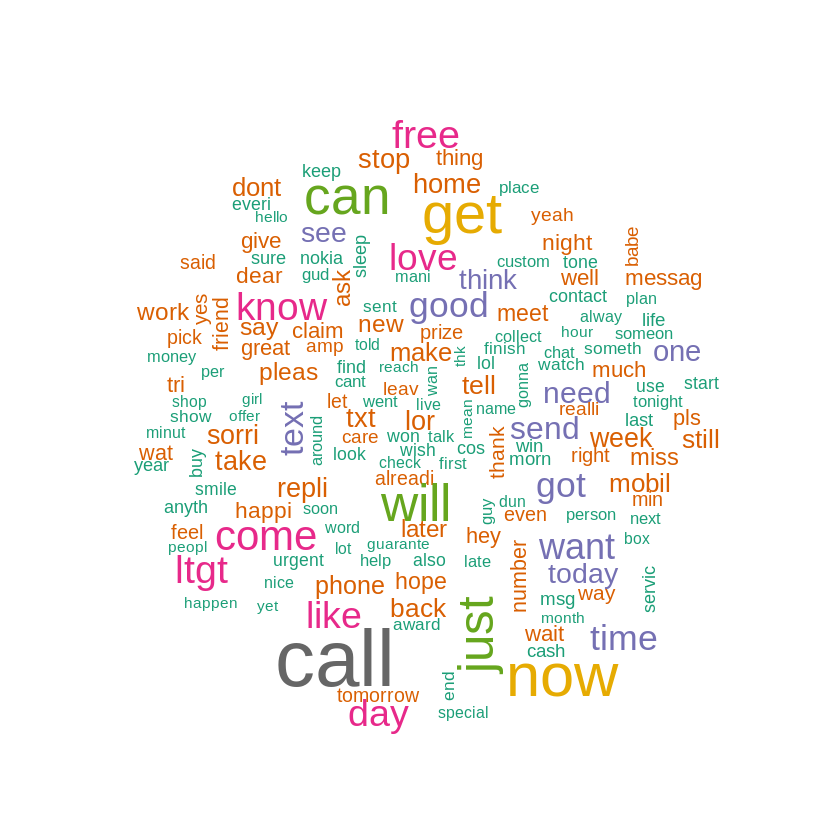

In [33]:
# ================================
# Step-8: World Cloud
# ================================

install.packages("wordcloud")
library(wordcloud)

# wordcloud(words, min.freq, random.order, colors)
#   words: the text corpus to visualize (here, 'sms_corpus_clean').
#   min.freq: minimum frequency threshold; only terms appearing at least this many times are included (here, 50).
#   random.order: if TRUE, words are plotted in random order; if FALSE, highest frequency words appear in the center.
#   colors: a vector of colors to use for the words (here, 8 colors from the "Dark2" palette in RColorBrewer).
#   return: generates a visual word cloud plot.
#   output: a graphical representation of the most frequent words in the corpus, where word size reflects frequency.
wordcloud(sms_corpus_clean,
          min.freq = 50,
          random.order = TRUE,
          colors = brewer.pal(8,"Dark2"))

# A word cloud displays words based on the frequency of their appearance.

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


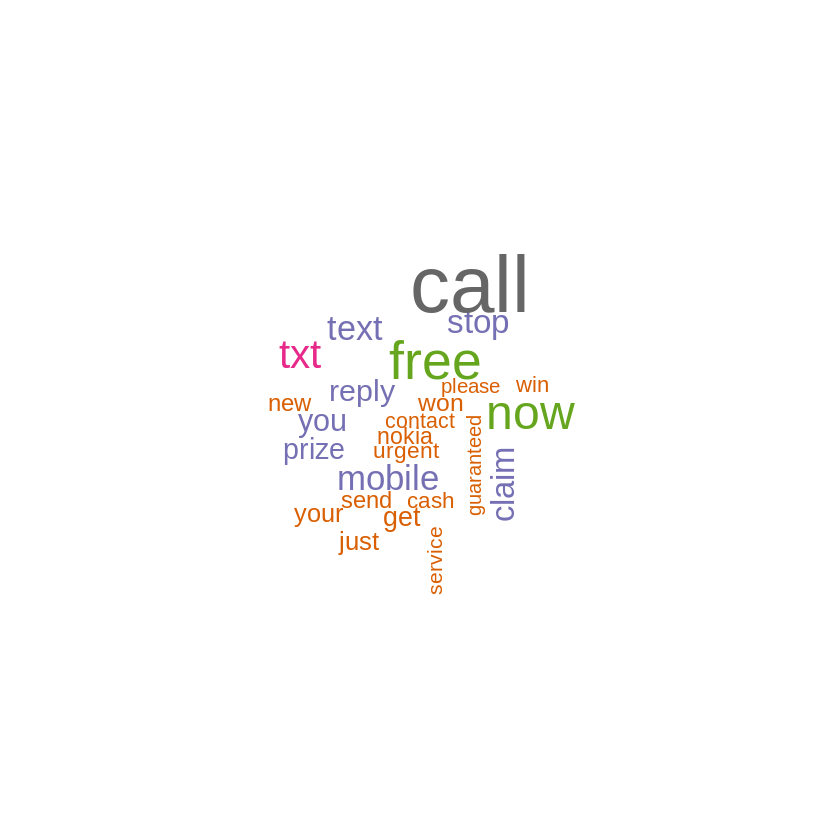

In [34]:
spam <- subset(sms_raw, type == "spam")
ham <- subset(sms_raw, type == "ham")

wordcloud(spam$text,
          min.freq = 50,
          random.order = TRUE,
          colors = brewer.pal(8,"Dark2"))

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


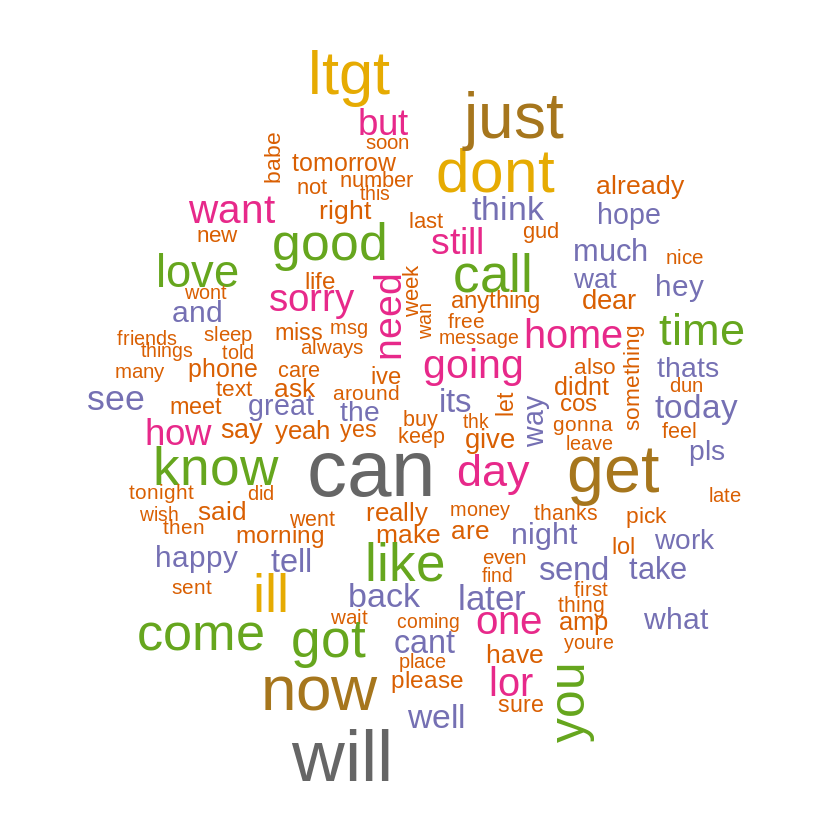

In [35]:
wordcloud(ham$text,
          min.freq = 50,
          random.order = TRUE,
          colors = brewer.pal(8,"Dark2"))

In [36]:
# ================================
# Step-9: Find Frequent Terms
# ================================
# Find frequent terms in training data

# findFreqTerms(x, lowfreq)
#   x: a DocumentTermMatrix (here, 'sms_dtm_train').
#   lowfreq: minimum term frequency to be included (here, 5).
#   return: vector of terms that occur at least 'lowfreq' times in the corpus.
#   output: character vector of frequent terms.

sms_freq_words <- findFreqTerms(sms_dtm_train, 5)


# DTM[rows, columns]
#   rows: all rows (training documents).
#   columns: only the frequent words (sms_freq_words).
#   return: a reduced DTM containing only frequent terms.
#   sms_dtm_freq_train: training DTM with selected frequent words.
#   output: DocumentTermMatrix with same rows as training but fewer columns (frequent terms only).
sms_dtm_freq_train <- sms_dtm_train[, sms_freq_words]

sms_dtm_freq_test <- sms_dtm_test[, sms_freq_words]

# convert_counts(x)
#   x: numeric vector (term frequencies for a document or column).
#   return: character vector where any value >0 is converted to "Yes", otherwise "No".
#   output: categorical representation of term presence.

convert_counts <- function(x){
  x = ifelse(x>0, "Yes", "No")
}

sms_train <- apply(sms_dtm_freq_train, 2, convert_counts)

sms_test <- apply(sms_dtm_freq_test, 2, convert_counts)

### 4.3. Naive Bayes Classification

In [37]:
# ================================
# Step-10: Naive Bayes Filter Model
# ================================

# Install and load the e1071 package for Naive Bayes.
install.packages('e1071')
library(e1071)

# Build the Naive Bayes model.
sms_classifier <- naiveBayes(sms_train, sms_train_labels)
sms_classifier

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = sms_train, y = sms_train_labels)

A-priori probabilities:
sms_train_labels
      ham      spam 
0.8647679 0.1352321 

Conditional probabilities:
                £wk
sms_train_labels          No         Yes
            ham  1.000000000 0.000000000
            spam 0.991708126 0.008291874

                abiola
sms_train_labels          No         Yes
            ham  0.997665975 0.002334025
            spam 1.000000000 0.000000000

                abl
sms_train_labels          No         Yes
            ham  0.994294606 0.005705394
            spam 1.000000000 0.000000000

                abt
sms_train_labels          No         Yes
            ham  0.994553942 0.005446058
            spam 1.000000000 0.000000000

                accept
sms_train_labels          No         Yes
            ham  0.998962656 0.001037344
            spam 1.000000000 0.000000000

                access
sms_train_labels           N

In [38]:
# ================================
# Step-11: Evaluation and Prediction
# ================================


# Make predictions on the test set.
sms_test_pred <- predict(sms_classifier,sms_test)

# install.packages("caret")
library("caret")
confusionMatrix(sms_test_pred, sms_test_labels, positive = "spam")

Confusion Matrix and Statistics

          Reference
Prediction ham spam
      ham  967    9
      spam   4  135
                                          
               Accuracy : 0.9883          
                 95% CI : (0.9801, 0.9938)
    No Information Rate : 0.8709          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9474          
                                          
 Mcnemar's Test P-Value : 0.2673          
                                          
            Sensitivity : 0.9375          
            Specificity : 0.9959          
         Pos Pred Value : 0.9712          
         Neg Pred Value : 0.9908          
             Prevalence : 0.1291          
         Detection Rate : 0.1211          
   Detection Prevalence : 0.1247          
      Balanced Accuracy : 0.9667          
                                          
       'Positive' Class : spam            
                           

## [5. Unstructured Data - Unsupervised Learning](#PartIV)

1. **Apriori Algorithm**: The Apriori Algorithm finds frequent associations between items in a dataset. It's used for market basket analysis to discover rules like "customers who buy A and B also tend to buy C." It works by identifying frequent itemsets and building rules from them.

In [39]:
# ================================
# Step-1: Load in the library
# ================================

# install.packages(pkg)
#   pkg: name of the R package to install (here, "arules").
#   return: installs the package from CRAN.
#   output: allows the use of functions for association rule mining.
install.packages("arules")
library(arules)

# ================================
# Step-2: Load in the data
# ================================

# read.transactions(file, sep)
#   file: path to the CSV file containing transaction data.
#   sep: separator used in the CSV file (here, comma).
#   return: reads the data into a 'transactions' object suitable for association rule mining.
#   data: stores the transactional dataset.
#   output: object of class 'transactions', representing items purchased per transaction.
data <- read.transactions("groceries.csv", sep=",")


# summary(object)
#   object: the transactions object (here, 'data').
#   return: summary statistics including number of transactions, items, density, and size distribution.
#   output: printed summary to console for inspection.
summary(data)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following object is masked from ‘package:bitops’:

    %&%



Attaching package: ‘arules’


The following object is masked from ‘package:tm’:

    inspect


The following objects are masked from ‘package:base’:

    abbreviate, write




transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
            labels
1 abrasive cleaner
2 artif. sweetener
3   baby cosmetics

In [40]:
# ================================
# Step-3: Train model
# ================================

# Apply the Apriori algorithm to generate association rules
# apriori(data, parameter = list(support, confidence, minlen))
#   data: a 'transactions' object containing the dataset to mine (here, 'data').
#   parameter: a list specifying thresholds for rule generation.
#       - support: minimum fraction of transactions in which the itemset appears (here, 0.001). This sets the minimum support threshold to 0.001. Support measures the proportion of transactions in which a rule appears. Rules with support greater than or equal to this threshold will be considered frequent
#       - confidence: minimum confidence threshold for the rules (here, 0.8). Confidence measures the strength of the association between items in a rule. Rules with confidence greater than or equal to this threshold will be considered strong
#       - minlen: minimum number of items in a rule (here, 2). In other words, it specifies that you are interested in association rules with at least two items on the left-hand side (antecedent)
#   return: generates a set of association rules that meet the specified thresholds.
#   rules: stores the generated association rules.
#   output: object of class 'rules' containing all discovered association rules.

rules <- apriori(data,
              parameter = list(support = 0.001,
                               confidence = 0.8,
                               minlen=  2))

# inspect rules: show top 10 rules by lift
# inspect(x)
#   x: a rules object or subset of rules.
#   return: displays details of the rules including LHS, RHS, support, confidence, and lift.
#   output: printed table of the selected rules with their metrics.
inspect(head(sort(rules,by="lift")[1:3]))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [410 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                         rhs                   support confidence    coverage     lift count
[1] {liquor,                                                                                       
     red/blush wine}         => {bottled beer}    0.001931876  0.9047619 0.0021352

We can see the combination of items that should be kept together.

In [ ]:
# practice to filter rules and visualize rules ...